# Projeto dados pluviometricos

In [46]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6


INFORMAÇÕES DO DATASET 

http://www.hidrologia.daee.sp.gov.br/

http://www.daee.sp.gov.br/site/

PREFIXO: 	E3-262

NOME DO POSTO: 	GUARAU

MUNICÍPIO: 	SAO PAULO	

CURSO D'ÁGUA: 	CABUCU DE BAIXO,R/(ITAGUACU,COR)

LATITUDE: 	23°26'33"

LONGITUDE: 	46°39'01"

DADOS DE 1985 A 2021

In [47]:
pluviometric_df = pd.read_csv('E3-262_Chuva_Mensal.csv', sep = ';')
pluviometric_df.head(3)

Ano Janeiro Fevereiro  Março  Abril   Maio  Junho Julho Agosto Setembro  \
0  1985   184,9     242,9    230     59  126,2   14,6     4   21,8    126,1   
1  1986   199,6       221  218,7  106,5  113,1    3,9  30,3    ---     34,5   
2  1987   525,8       ---  161,3   98,1  293,8  183,9  11,8   30,9     80,2   

  Outubro Novembro Dezembro  
0    71,1    111,3    155,2  
1    60,7    242,5    389,9  
2    84,8     72,7    152,1

In [48]:
pluviometric_df.columns

Index(['Ano', 'Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho',
       'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype='object')

In [49]:
pluviometric_df.shape

(38, 13)

In [50]:
pluviometric_df.dtypes

Ano          object
Janeiro      object
Fevereiro    object
Março        object
Abril        object
Maio         object
Junho        object
Julho        object
Agosto       object
Setembro     object
Outubro      object
Novembro     object
Dezembro     object
dtype: object

In [51]:
pluviometric_df = pluviometric_df.apply(lambda x: x.str.replace(',', '.'))
pluviometric_df.head(3)

Ano Janeiro Fevereiro  Março  Abril   Maio  Junho Julho Agosto Setembro  \
0  1985   184.9     242.9    230     59  126.2   14.6     4   21.8    126.1   
1  1986   199.6       221  218.7  106.5  113.1    3.9  30.3    ---     34.5   
2  1987   525.8       ---  161.3   98.1  293.8  183.9  11.8   30.9     80.2   

  Outubro Novembro Dezembro  
0    71.1    111.3    155.2  
1    60.7    242.5    389.9  
2    84.8     72.7    152.1

In [52]:
#Transformar variáveis categóricas em numéricas e substituir os traços pela média
pluviometric_df['Janeiro'] =  pd.to_numeric(pluviometric_df['Janeiro'].str.replace('---', '500.3'))
pluviometric_df['Fevereiro'] =  pd.to_numeric(pluviometric_df['Fevereiro'].str.replace('---', '249.3'))
pluviometric_df['Março'] =  pd.to_numeric(pluviometric_df['Março'].str.replace('---', '227.97'))
pluviometric_df['Abril'] =  pd.to_numeric(pluviometric_df['Abril'].str.replace('---', '93.64'))
pluviometric_df['Maio'] =  pd.to_numeric(pluviometric_df['Maio'].str.replace('---', '86.67'))
pluviometric_df['Junho'] =  pd.to_numeric(pluviometric_df['Junho'].str.replace('---', '59.66'))
pluviometric_df['Julho'] =  pd.to_numeric(pluviometric_df['Julho'].str.replace('---', '54.6'))
pluviometric_df['Agosto'] =  pd.to_numeric(pluviometric_df['Agosto'].str.replace('---', '27.85'))
pluviometric_df['Setembro'] =  pd.to_numeric(pluviometric_df['Setembro'].str.replace('---', '83.8'))
pluviometric_df['Outubro'] =  pd.to_numeric(pluviometric_df['Outubro'].str.replace('---', '139.89'))
pluviometric_df['Novembro'] =  pd.to_numeric(pluviometric_df['Novembro'].str.replace('---', '145.04'))
pluviometric_df['Dezembro'] =  pd.to_numeric(pluviometric_df['Dezembro'].str.replace('---', '236.04'))
print(pluviometric_df)

         Ano  Janeiro  Fevereiro   Março   Abril    Maio   Junho  Julho  \
0       1985   184.90      242.9  230.00   59.00  126.20   14.60    4.0   
1       1986   199.60      221.0  218.70  106.50  113.10    3.90   30.3   
2       1987   525.80      249.3  161.30   98.10  293.80  183.90   11.8   
3       1988   268.70      224.4  189.20  175.10  224.90   58.60    1.3   
4       1989   312.90      344.3  288.20   66.30   21.70   52.50  150.1   
5       1990   284.10      196.9  310.10   85.80   77.90   50.60  121.2   
6       1991   330.70      340.3  522.40  200.30   43.30   96.80   28.2   
7       1992   129.20      258.5  227.97   87.20   93.50   11.60   40.9   
8       1993   221.50      225.7  110.00   84.60  133.90   74.70   11.2   
9       1994   196.90      184.4  231.60  111.40   54.90   30.50   39.2   
10      1995   373.80      383.1  267.70   73.90   79.70   31.20   46.8   
11      1996   334.30      376.5  284.50   42.30   21.70   45.10   12.2   
12      1997   235.00    

In [53]:
pluviometric_df.dtypes

Ano           object
Janeiro      float64
Fevereiro    float64
Março        float64
Abril        float64
Maio         float64
Junho        float64
Julho        float64
Agosto       float64
Setembro     float64
Outubro      float64
Novembro     float64
Dezembro     float64
dtype: object

In [54]:
pluviometric_df2 = pluviometric_df.drop([36, 37])
pluviometric_df2

Ano  Janeiro  Fevereiro   Março  Abril   Maio   Junho  Julho  Agosto  \
0   1985    184.9      242.9  230.00   59.0  126.2   14.60    4.0   21.80   
1   1986    199.6      221.0  218.70  106.5  113.1    3.90   30.3   27.85   
2   1987    525.8      249.3  161.30   98.1  293.8  183.90   11.8   30.90   
3   1988    268.7      224.4  189.20  175.1  224.9   58.60    1.3    0.20   
4   1989    312.9      344.3  288.20   66.3   21.7   52.50  150.1   32.90   
5   1990    284.1      196.9  310.10   85.8   77.9   50.60  121.2   76.30   
6   1991    330.7      340.3  522.40  200.3   43.3   96.80   28.2   37.30   
7   1992    129.2      258.5  227.97   87.2   93.5   11.60   40.9   24.70   
8   1993    221.5      225.7  110.00   84.6  133.9   74.70   11.2   40.80   
9   1994    196.9      184.4  231.60  111.4   54.9   30.50   39.2    2.40   
10  1995    373.8      383.1  267.70   73.9   79.7   31.20   46.8    1.50   
11  1996    334.3      376.5  284.50   42.3   21.7   45.10   12.2   41.20   
12  1997    235.0      187.6   57.10   63.2   88.2  124.70   12.5   28.80   
13  1998    231.6      430.1  211.20   56.9  133.8   16.60   16.6   45.50   
14  1999    500.3      339.0  162.30   34.9   47.2   86.30   31.0    0.00   
15  2000    387.7      304.0  190.40   50.0    9.7    9.80   74.0   27.85   
16  2001    283.1      221.9  241.20   28.7   85.0   31.00   31.7   26.90   
17  2002    300.6      173.6  354.80   95.3  137.6    2.30   23.0   41.50   
18  2003    443.4      141.5  250.20   45.5   36.6   20.70   24.5   27.60   
19  2004    188.8      316.9  127.20  160.5   77.4   75.60  105.6    2.20   
20  2005    378.3       95.9  202.10  137.3  177.1   35.10   39.8   11.50   
21  2006    230.9      223.5  407.90   65.4   23.7   34.80   78.6    9.20   
22  2007    208.7      301.0  240.20   67.6   63.1   17.20  134.3    0.10   
23  2008    388.0      136.4  332.80  123.6   80.9   55.70    0.0   52.50   
24  2009    356.4      145.0   73.60   75.3   58.1   28.30  157.7   27.85   
25  2010    549.1      175.4  258.90  116.4   52.8   20.20   78.4    1.20   
26  2011    428.4      349.5  265.10  142.0   40.1   81.30    1.5   49.70   
27  2012    401.5      226.0  165.90  149.1   82.4   59.66  105.5    3.70   
28  2013    321.7      372.1  175.00  103.4   39.4  210.90  168.8   15.30   
29  2014    189.7      236.1  222.90  110.2   71.0   11.50   51.9   20.50   
30  2015    249.3      303.5  265.90  100.4   87.2   25.40   62.7   40.50   
31  2016    242.8      225.2  288.10   92.2  141.4  207.30    0.0   82.20   
32  2017    500.3      249.3  120.80  156.3  166.1  101.60    0.2   53.40   
33  2018    238.2       84.5  227.97   66.4   25.8   15.00   20.5   27.85   
34  2019    500.3      315.5  318.50  172.3   97.3   59.00  195.1    6.70   
35  2020    408.1      249.3   95.50    5.6   13.7  163.80   54.6   62.10   

    Setembro  Outubro  Novembro  Dezembro  
0      126.1    71.10    111.30    155.20  
1       34.5    60.70    242.50    389.90  
2       80.2    84.80     72.70    152.10  
3       28.4   173.90    100.20    289.80  
4       52.1    80.10     88.00    236.70  
5       97.2   206.80    116.30    149.80  
6      101.4   168.00     67.30    237.90  
7      150.6   219.60    145.04    211.70  
8      210.1   134.10    125.50    170.50  
9        1.8   147.60     86.60    276.30  
10      44.2   202.60    115.10    236.04  
11     179.4   179.80     87.40    243.90  
12     118.0   151.80    236.30    217.40  
13      99.5   203.10     41.50    198.40  
14      76.9    64.50     76.00    100.40  
15     120.3   105.50    322.00    281.00  
16      82.3   213.10    181.60    292.90  
17      84.0   143.90    201.40    263.70  
18      41.5   176.70    133.00     89.90  
19      13.8   120.60    215.50    181.00  
20     150.3   195.30     96.60    140.10  
21      86.2    71.90    175.00    353.30  
22      27.4   167.20    211.70    268.70  
23      49.9   144.30    125.40    152.90  
24     198.9   157.40    237.20    294.50  
25     100.

In [55]:
pluviometric_df2.to_csv('pluviometric_df2_cleaned.csv', sep = ';', index = False)

### Criacao da serie temporal

In [56]:
pluviometric_cleaned = pd.read_csv('pluviometric_df2_cleaned.csv', sep = ';')
pluviometric_cleaned

Ano  Janeiro  Fevereiro   Março  Abril   Maio   Junho  Julho  Agosto  \
0   1985    184.9      242.9  230.00   59.0  126.2   14.60    4.0   21.80   
1   1986    199.6      221.0  218.70  106.5  113.1    3.90   30.3   27.85   
2   1987    525.8      249.3  161.30   98.1  293.8  183.90   11.8   30.90   
3   1988    268.7      224.4  189.20  175.1  224.9   58.60    1.3    0.20   
4   1989    312.9      344.3  288.20   66.3   21.7   52.50  150.1   32.90   
5   1990    284.1      196.9  310.10   85.8   77.9   50.60  121.2   76.30   
6   1991    330.7      340.3  522.40  200.3   43.3   96.80   28.2   37.30   
7   1992    129.2      258.5  227.97   87.2   93.5   11.60   40.9   24.70   
8   1993    221.5      225.7  110.00   84.6  133.9   74.70   11.2   40.80   
9   1994    196.9      184.4  231.60  111.4   54.9   30.50   39.2    2.40   
10  1995    373.8      383.1  267.70   73.9   79.7   31.20   46.8    1.50   
11  1996    334.3      376.5  284.50   42.3   21.7   45.10   12.2   41.20   
12  1997    235.0      187.6   57.10   63.2   88.2  124.70   12.5   28.80   
13  1998    231.6      430.1  211.20   56.9  133.8   16.60   16.6   45.50   
14  1999    500.3      339.0  162.30   34.9   47.2   86.30   31.0    0.00   
15  2000    387.7      304.0  190.40   50.0    9.7    9.80   74.0   27.85   
16  2001    283.1      221.9  241.20   28.7   85.0   31.00   31.7   26.90   
17  2002    300.6      173.6  354.80   95.3  137.6    2.30   23.0   41.50   
18  2003    443.4      141.5  250.20   45.5   36.6   20.70   24.5   27.60   
19  2004    188.8      316.9  127.20  160.5   77.4   75.60  105.6    2.20   
20  2005    378.3       95.9  202.10  137.3  177.1   35.10   39.8   11.50   
21  2006    230.9      223.5  407.90   65.4   23.7   34.80   78.6    9.20   
22  2007    208.7      301.0  240.20   67.6   63.1   17.20  134.3    0.10   
23  2008    388.0      136.4  332.80  123.6   80.9   55.70    0.0   52.50   
24  2009    356.4      145.0   73.60   75.3   58.1   28.30  157.7   27.85   
25  2010    549.1      175.4  258.90  116.4   52.8   20.20   78.4    1.20   
26  2011    428.4      349.5  265.10  142.0   40.1   81.30    1.5   49.70   
27  2012    401.5      226.0  165.90  149.1   82.4   59.66  105.5    3.70   
28  2013    321.7      372.1  175.00  103.4   39.4  210.90  168.8   15.30   
29  2014    189.7      236.1  222.90  110.2   71.0   11.50   51.9   20.50   
30  2015    249.3      303.5  265.90  100.4   87.2   25.40   62.7   40.50   
31  2016    242.8      225.2  288.10   92.2  141.4  207.30    0.0   82.20   
32  2017    500.3      249.3  120.80  156.3  166.1  101.60    0.2   53.40   
33  2018    238.2       84.5  227.97   66.4   25.8   15.00   20.5   27.85   
34  2019    500.3      315.5  318.50  172.3   97.3   59.00  195.1    6.70   
35  2020    408.1      249.3   95.50    5.6   13.7  163.80   54.6   62.10   

    Setembro  Outubro  Novembro  Dezembro  
0      126.1    71.10    111.30    155.20  
1       34.5    60.70    242.50    389.90  
2       80.2    84.80     72.70    152.10  
3       28.4   173.90    100.20    289.80  
4       52.1    80.10     88.00    236.70  
5       97.2   206.80    116.30    149.80  
6      101.4   168.00     67.30    237.90  
7      150.6   219.60    145.04    211.70  
8      210.1   134.10    125.50    170.50  
9        1.8   147.60     86.60    276.30  
10      44.2   202.60    115.10    236.04  
11     179.4   179.80     87.40    243.90  
12     118.0   151.80    236.30    217.40  
13      99.5   203.10     41.50    198.40  
14      76.9    64.50     76.00    100.40  
15     120.3   105.50    322.00    281.00  
16      82.3   213.10    181.60    292.90  
17      84.0   143.90    201.40    263.70  
18      41.5   176.70    133.00     89.90  
19      13.8   120.60    215.50    181.00  
20     150.3   195.30     96.60    140.10  
21      86.2    71.90    175.00    353.30  
22      27.4   167.20    211.70    268.70  
23      49.9   144.30    125.40    152.90  
24     198.9   157.40    237.20    294.50  
25     100.

In [57]:
pluviometric_cleaned = pluviometric_cleaned.drop(columns=['Ano'])
pluviometric_cleaned

Janeiro  Fevereiro   Março  Abril   Maio   Junho  Julho  Agosto  Setembro  \
0     184.9      242.9  230.00   59.0  126.2   14.60    4.0   21.80     126.1   
1     199.6      221.0  218.70  106.5  113.1    3.90   30.3   27.85      34.5   
2     525.8      249.3  161.30   98.1  293.8  183.90   11.8   30.90      80.2   
3     268.7      224.4  189.20  175.1  224.9   58.60    1.3    0.20      28.4   
4     312.9      344.3  288.20   66.3   21.7   52.50  150.1   32.90      52.1   
5     284.1      196.9  310.10   85.8   77.9   50.60  121.2   76.30      97.2   
6     330.7      340.3  522.40  200.3   43.3   96.80   28.2   37.30     101.4   
7     129.2      258.5  227.97   87.2   93.5   11.60   40.9   24.70     150.6   
8     221.5      225.7  110.00   84.6  133.9   74.70   11.2   40.80     210.1   
9     196.9      184.4  231.60  111.4   54.9   30.50   39.2    2.40       1.8   
10    373.8      383.1  267.70   73.9   79.7   31.20   46.8    1.50      44.2   
11    334.3      376.5  284.50   42.3   21.7   45.10   12.2   41.20     179.4   
12    235.0      187.6   57.10   63.2   88.2  124.70   12.5   28.80     118.0   
13    231.6      430.1  211.20   56.9  133.8   16.60   16.6   45.50      99.5   
14    500.3      339.0  162.30   34.9   47.2   86.30   31.0    0.00      76.9   
15    387.7      304.0  190.40   50.0    9.7    9.80   74.0   27.85     120.3   
16    283.1      221.9  241.20   28.7   85.0   31.00   31.7   26.90      82.3   
17    300.6      173.6  354.80   95.3  137.6    2.30   23.0   41.50      84.0   
18    443.4      141.5  250.20   45.5   36.6   20.70   24.5   27.60      41.5   
19    188.8      316.9  127.20  160.5   77.4   75.60  105.6    2.20      13.8   
20    378.3       95.9  202.10  137.3  177.1   35.10   39.8   11.50     150.3   
21    230.9      223.5  407.90   65.4   23.7   34.80   78.6    9.20      86.2   
22    208.7      301.0  240.20   67.6   63.1   17.20  134.3    0.10      27.4   
23    388.0      136.4  332.80  123.6   80.9   55.70    0.0   52.50      49.9   
24    356.4      145.0   73.60   75.3   58.1   28.30  157.7   27.85     198.9   
25    549.1      175.4  258.90  116.4   52.8   20.20   78.4    1.20     100.4   
26    428.4      349.5  265.10  142.0   40.1   81.30    1.5   49.70      10.7   
27    401.5      226.0  165.90  149.1   82.4   59.66  105.5    3.70      31.9   
28    321.7      372.1  175.00  103.4   39.4  210.90  168.8   15.30      45.1   
29    189.7      236.1  222.90  110.2   71.0   11.50   51.9   20.50      82.1   
30    249.3      303.5  265.90  100.4   87.2   25.40   62.7   40.50     280.9   
31    242.8      225.2  288.10   92.2  141.4  207.30    0.0   82.20      29.1   
32    500.3      249.3  120.80  156.3  166.1  101.60    0.2   53.40      12.0   
33    238.2       84.5  227.97   66.4   25.8   15.00   20.5   27.85      72.9   
34    500.3      315.5  318.50  172.3   97.3   59.00  195.1    6.70      73.7   
35    408.1      249.3   95.50    5.6   13.7  163.80   54.6   62.10      22.9   

    Outubro  Novembro  Dezembro  
0     71.10    111.30    155.20  
1     60.70    242.50    389.90  
2     84.80     72.70    152.10  
3    173.90    100.20    289.80  
4     80.10     88.00    236.70  
5    206.80    116.30    149.80  
6    168.00     67.30    237.90  
7    219.60    145.04    211.70  
8    134.10    125.50    170.50  
9    147.60     86.60    276.30  
10   202.60    115.10    236.04  
11   179.80     87.40    243.90  
12   151.80    236.30    217.40  
13   203.10     41.50    198.40  
14    64.50     76.00    100.40  
15   105.50    322.00    281.00  
16   213.10    181.60    292.90  
17   143.90    201.40    263.70  
18   176.70    133.00     89.90  
19   120.60    215.50    181.00  
20   195.30     96.60    140.10  
21    71.90    175.00    353.30  
22   167.20    211.70    268.70  
23   144.30    125.40    152.90  
24   157.40    237.20    294.50  
25    73.80    129.20    234.70  
26   218.20     73.40    393.70  
27    93.90    154.00    623.20  
28   110.70     76.6

In [58]:
# conversao para array nao eh ideal, ele quebra em vetores por linha
pluviometric_cleaned.values

array([[1.8490e+02, 2.4290e+02, 2.3000e+02, 5.9000e+01, 1.2620e+02,
        1.4600e+01, 4.0000e+00, 2.1800e+01, 1.2610e+02, 7.1100e+01,
        1.1130e+02, 1.5520e+02],
       [1.9960e+02, 2.2100e+02, 2.1870e+02, 1.0650e+02, 1.1310e+02,
        3.9000e+00, 3.0300e+01, 2.7850e+01, 3.4500e+01, 6.0700e+01,
        2.4250e+02, 3.8990e+02],
       [5.2580e+02, 2.4930e+02, 1.6130e+02, 9.8100e+01, 2.9380e+02,
        1.8390e+02, 1.1800e+01, 3.0900e+01, 8.0200e+01, 8.4800e+01,
        7.2700e+01, 1.5210e+02],
       [2.6870e+02, 2.2440e+02, 1.8920e+02, 1.7510e+02, 2.2490e+02,
        5.8600e+01, 1.3000e+00, 2.0000e-01, 2.8400e+01, 1.7390e+02,
        1.0020e+02, 2.8980e+02],
       [3.1290e+02, 3.4430e+02, 2.8820e+02, 6.6300e+01, 2.1700e+01,
        5.2500e+01, 1.5010e+02, 3.2900e+01, 5.2100e+01, 8.0100e+01,
        8.8000e+01, 2.3670e+02],
       [2.8410e+02, 1.9690e+02, 3.1010e+02, 8.5800e+01, 7.7900e+01,
        5.0600e+01, 1.2120e+02, 7.6300e+01, 9.7200e+01, 2.0680e+02,
        1.1630e+02,

In [59]:
# melhor opcao eh converter o array em lista em conjunto com o metodo flaten (matriz_to_onedimension)
pluviometric_cleaned_flatened = list(pluviometric_cleaned.values.flatten())
print(pluviometric_cleaned_flatened)

[184.9, 242.9, 230.0, 59.0, 126.2, 14.6, 4.0, 21.8, 126.1, 71.1, 111.3, 155.2, 199.6, 221.0, 218.7, 106.5, 113.1, 3.9, 30.3, 27.85, 34.5, 60.7, 242.5, 389.9, 525.8, 249.3, 161.3, 98.1, 293.8, 183.9, 11.8, 30.9, 80.2, 84.8, 72.7, 152.1, 268.7, 224.4, 189.2, 175.1, 224.9, 58.6, 1.3, 0.2, 28.4, 173.9, 100.2, 289.8, 312.9, 344.3, 288.2, 66.3, 21.7, 52.5, 150.1, 32.9, 52.1, 80.1, 88.0, 236.7, 284.1, 196.9, 310.1, 85.8, 77.9, 50.6, 121.2, 76.3, 97.2, 206.8, 116.3, 149.8, 330.7, 340.3, 522.4, 200.3, 43.3, 96.8, 28.2, 37.3, 101.4, 168.0, 67.3, 237.9, 129.2, 258.5, 227.97, 87.2, 93.5, 11.6, 40.9, 24.7, 150.6, 219.6, 145.04, 211.7, 221.5, 225.7, 110.0, 84.6, 133.9, 74.7, 11.2, 40.8, 210.1, 134.1, 125.5, 170.5, 196.9, 184.4, 231.6, 111.4, 54.9, 30.5, 39.2, 2.4, 1.8, 147.6, 86.6, 276.3, 373.8, 383.1, 267.7, 73.9, 79.7, 31.2, 46.8, 1.5, 44.2, 202.6, 115.1, 236.04, 334.3, 376.5, 284.5, 42.3, 21.7, 45.1, 12.2, 41.2, 179.4, 179.8, 87.4, 243.9, 235.0, 187.6, 57.1, 63.2, 88.2, 124.7, 12.5, 28.8, 118.0, 

In [60]:
indice = pd.date_range('1985', 
#                        pluviometric_cleaned_flatened, 
                       periods = len(pluviometric_cleaned_flatened), 
                       freq = 'M')


serie5 = pd.Series(pluviometric_cleaned_flatened, index = indice)
serie5


1985-01-31    184.90
1985-02-28    242.90
1985-03-31    230.00
1985-04-30     59.00
1985-05-31    126.20
               ...  
2020-08-31     62.10
2020-09-30     22.90
2020-10-31    213.90
2020-11-30    162.10
2020-12-31    236.04
Freq: M, Length: 432, dtype: float64

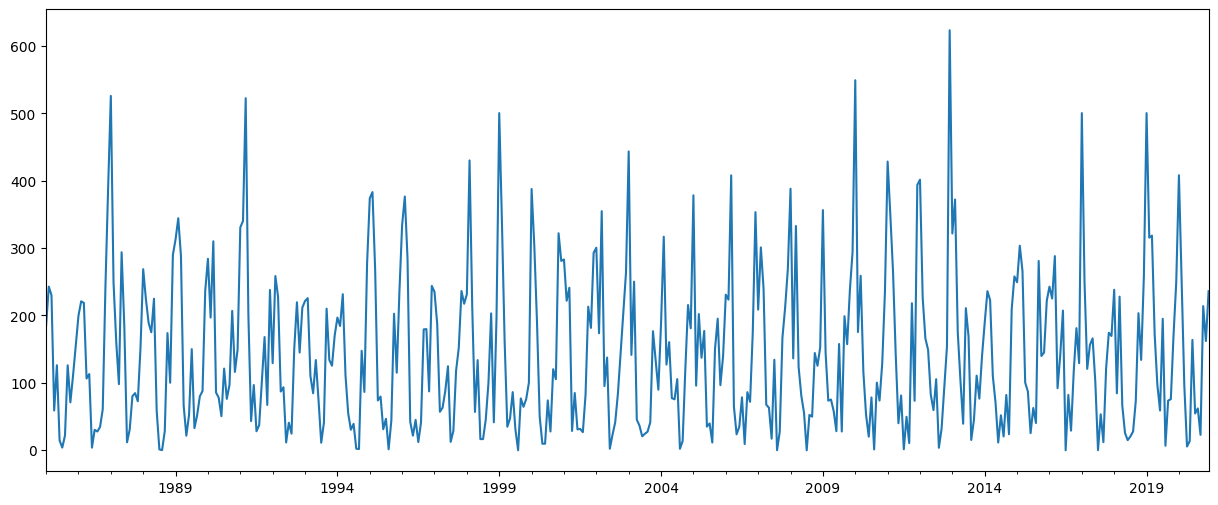

In [61]:
serie5.plot()
plt.show()

### Análise e preparação da serie temporal

In [62]:
media_model6m = serie5.rolling(window = 6)
media_model6m = media_model6m.mean()

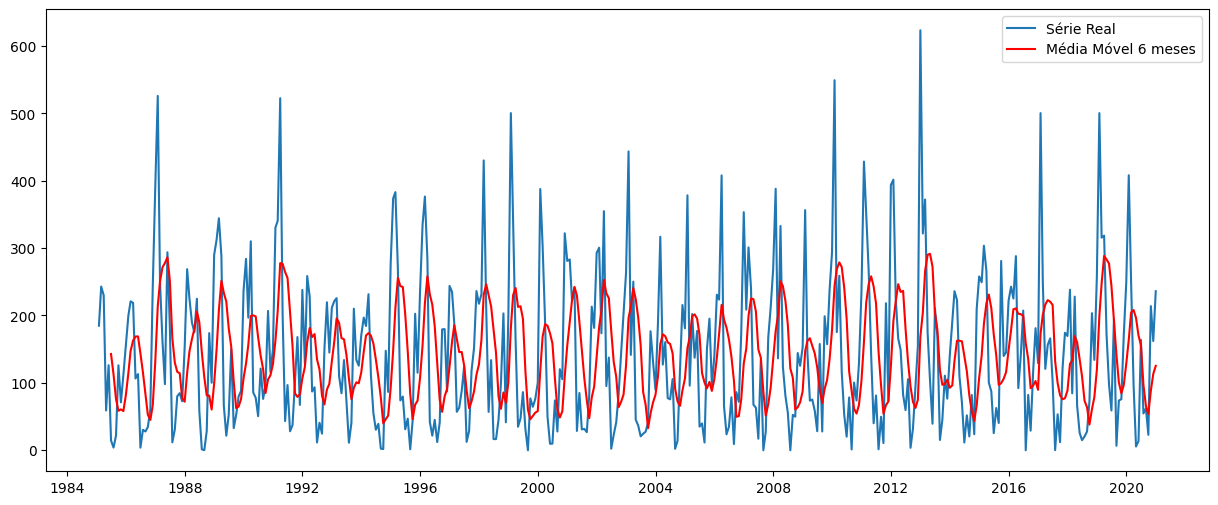

In [63]:
plt.plot(serie5, label='Série Real')
plt.plot(media_model6m, color='red', label='Média Móvel 6 meses')
plt.legend(loc='best')
plt.show()

## Decomposição da series (tendencia, sazonalidade e desvios)

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao_serie5 = seasonal_decompose(serie5)


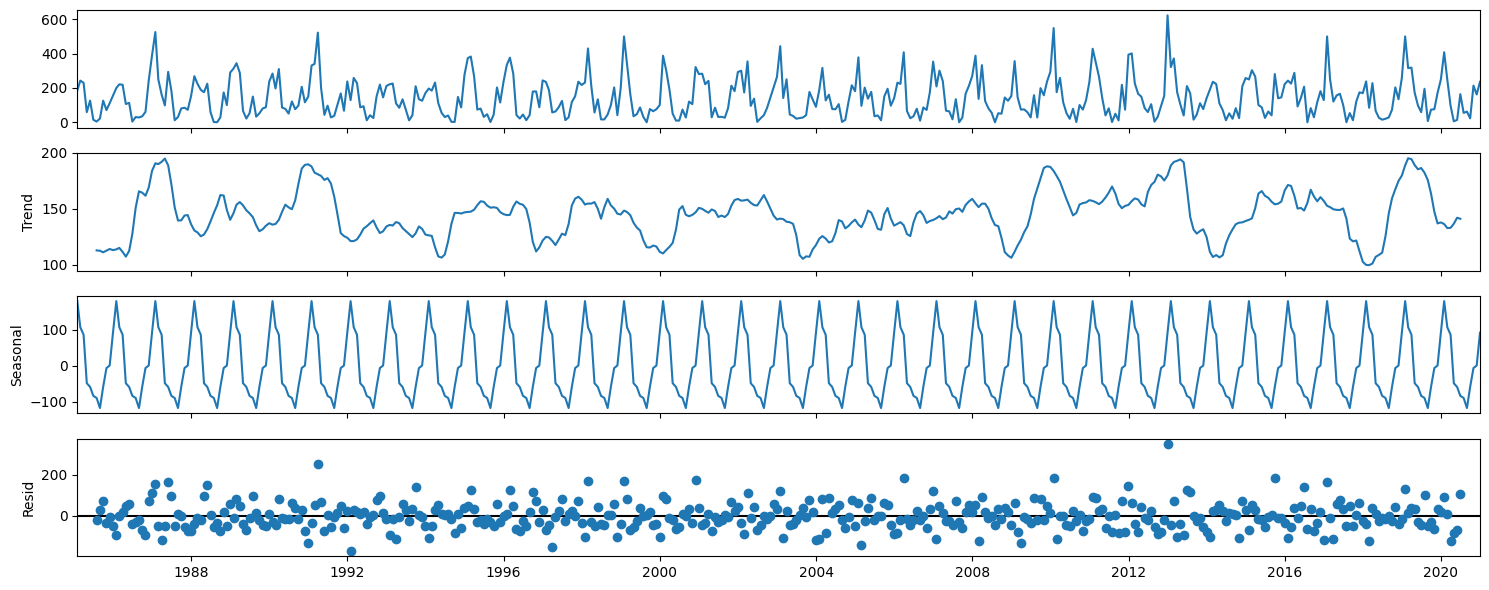

In [65]:
decomposicao_serie5.plot()
plt.show()

## Normalidade e transformação

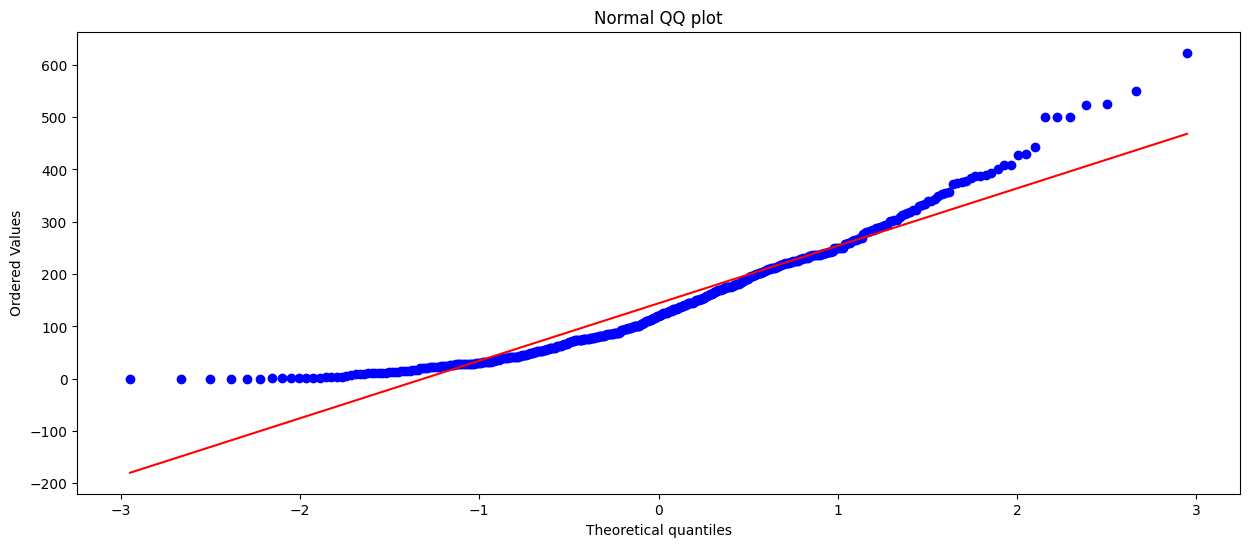

In [66]:
import scipy.stats as stats


stats.probplot(serie5, dist = 'norm', plot = plt)
plt.title('Normal QQ plot')
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [67]:
e, p = stats.shapiro(serie5)
print('Estatística de teste: \t {}'.format(e))
print('p-valor: \t\t {}'.format(p))

Estatística de teste: 	 0.9187195301055908
p-valor: 		 1.6446762503871497e-14


In [68]:
transf_serie_tolog_e = np.log(serie5)
transf_serie_tolog_e

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


1985-01-31    5.219815
1985-02-28    5.492650
1985-03-31    5.438079
1985-04-30    4.077537
1985-05-31    4.837868
                ...   
2020-08-31    4.128746
2020-09-30    3.131137
2020-10-31    5.365509
2020-11-30    5.088213
2020-12-31    5.464001
Freq: M, Length: 432, dtype: float64

In [69]:
e, p = stats.shapiro(transf_serie_tolog_e)
print('Estatística de teste: \t {}'.format(e))
print('p-valor: \t\t {}'.format(p))

Estatística de teste: 	 nan
p-valor: 		 1.0


o teste acima deu erro porque ocorreu divisao por zero no calculo do log

In [70]:
transf_serie_to_raiz_cubica = serie5**(1/3)
transf_serie_to_raiz_cubica

1985-01-31    5.696992
1985-02-28    6.239395
1985-03-31    6.126926
1985-04-30    3.892996
1985-05-31    5.015949
                ...   
2020-08-31    3.960018
2020-09-30    2.839739
2020-10-31    5.980492
2020-11-30    5.452483
2020-12-31    6.180096
Freq: M, Length: 432, dtype: float64

In [71]:
e, p = stats.shapiro(transf_serie_to_raiz_cubica)
print('Estatística de teste: \t {}'.format(e))
print('p-valor: \t\t {}'.format(p))

Estatística de teste: 	 0.9854329228401184
p-valor: 		 0.00024957521236501634


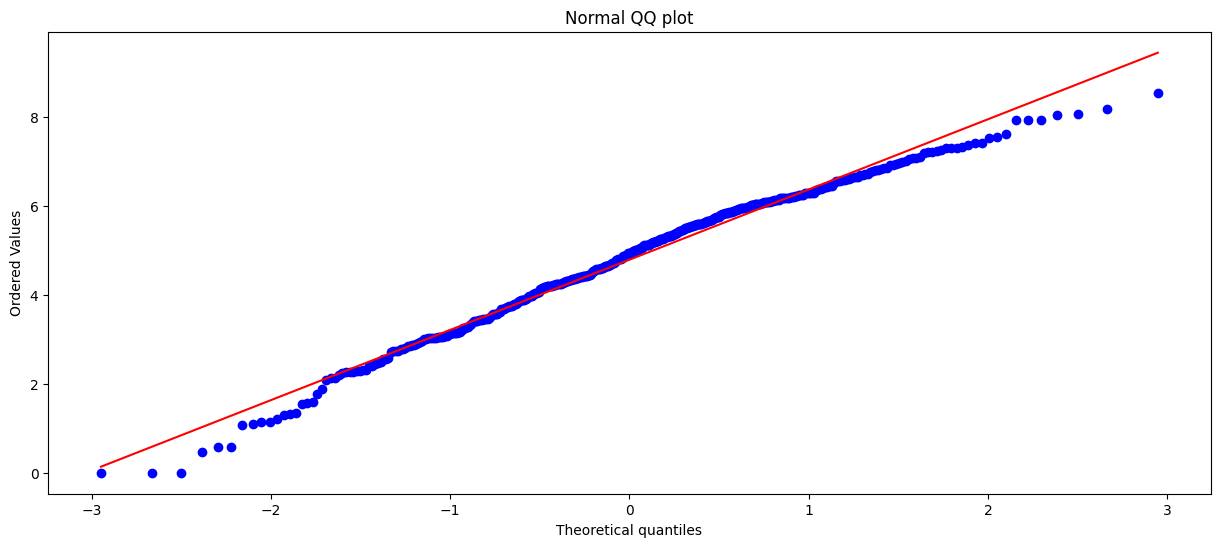

In [72]:
import scipy.stats as stats


stats.probplot(transf_serie_to_raiz_cubica, dist = 'norm', plot = plt)
plt.title('Normal QQ plot')
plt.show()

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

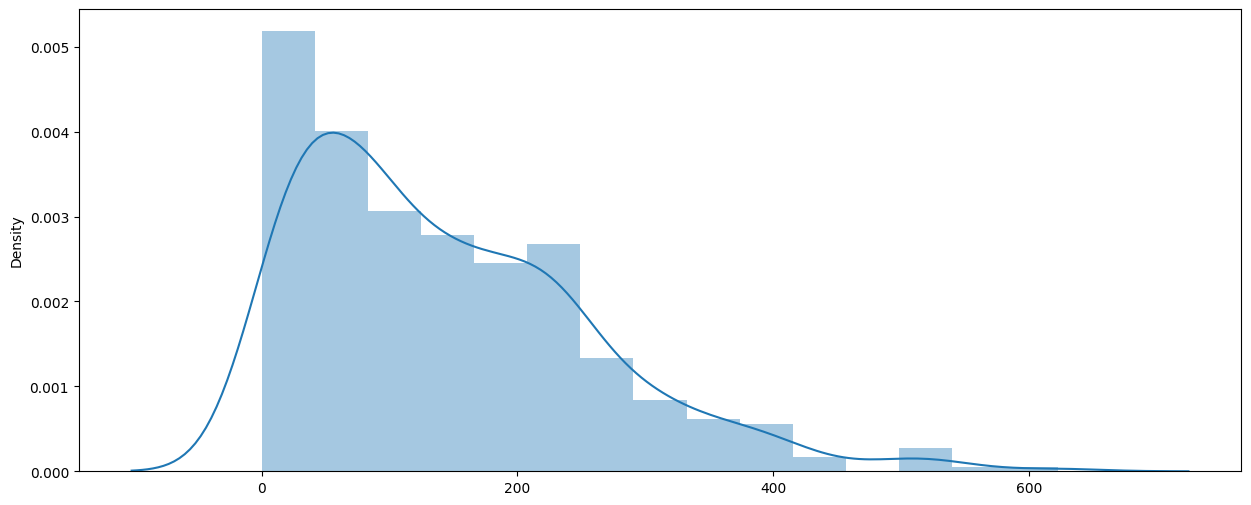

In [73]:
import seaborn as sns

sns.distplot(serie5)

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: ylabel='Density'>

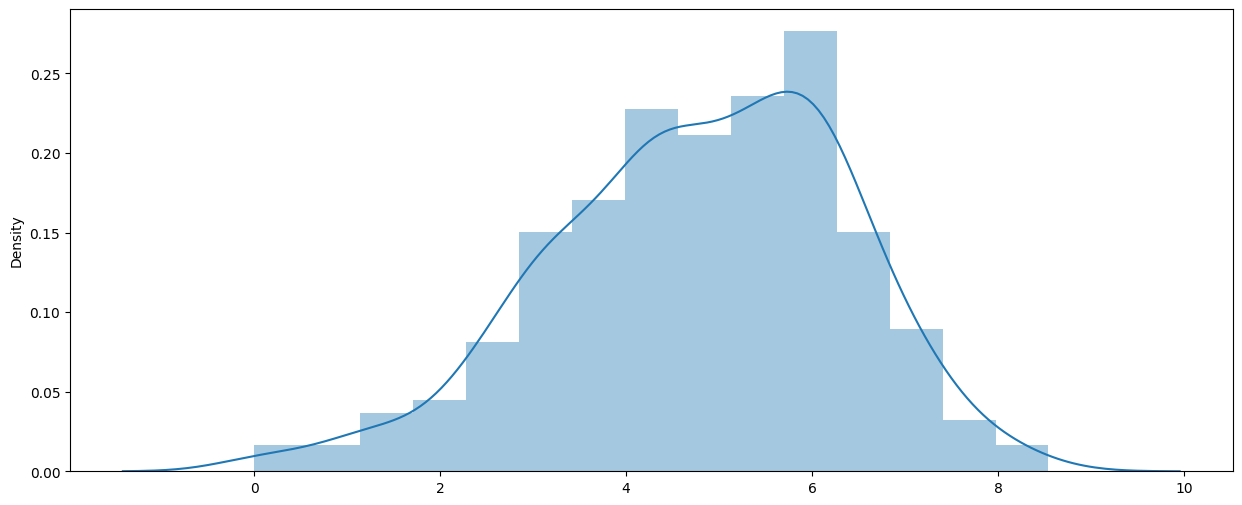

In [74]:

sns.distplot(transf_serie_to_raiz_cubica)

### Estacionariedade

In [75]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [76]:
kpss = statsmodels.tsa.stattools.kpss(transf_serie_to_raiz_cubica)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))


Estatítica do teste: 0.0222
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


/var/folders/gt/rtqg_w150cjfswljghbp3d5r0000gp/T/ipykernel_38540/1705566888.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(transf_serie_to_raiz_cubica)


É estacionária! Se não fosse poderíamos diferenciar para torna-la estacionária

# Autocorrelação

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

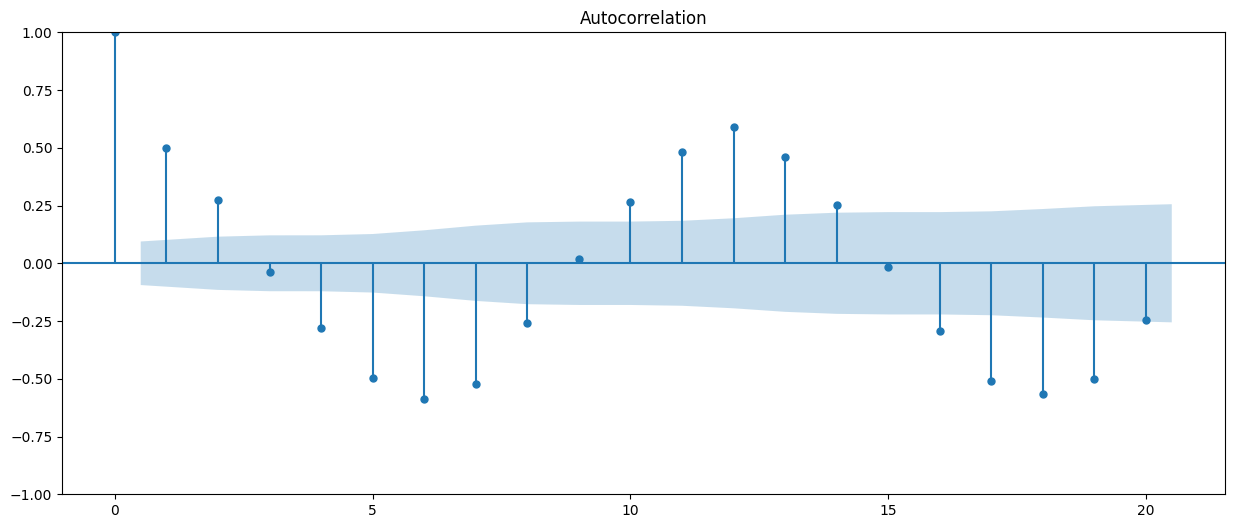

In [78]:
plot_acf(transf_serie_to_raiz_cubica, lags=20)
plt.show()

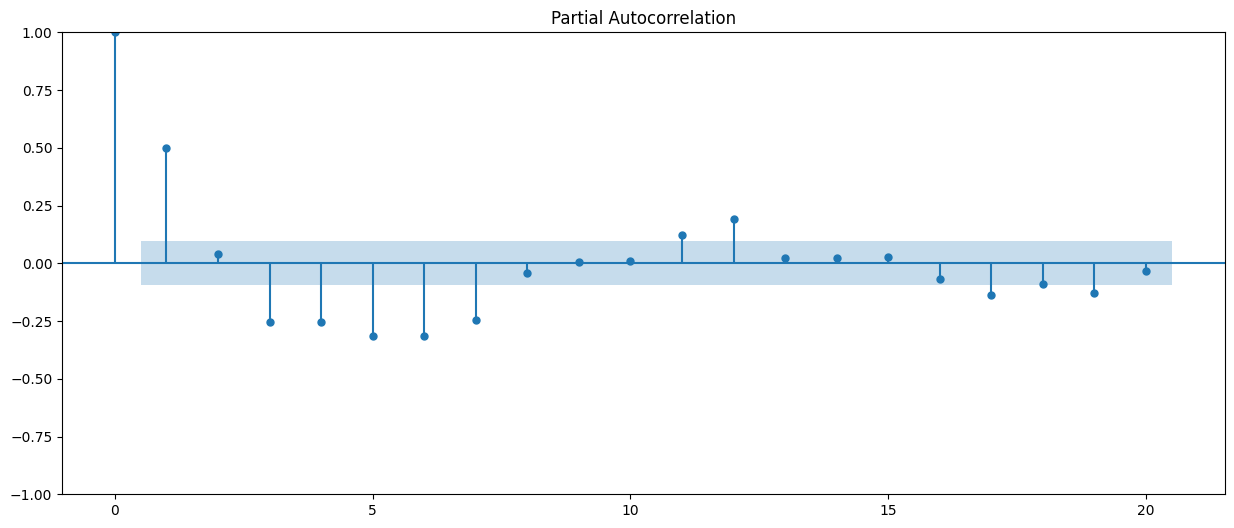

In [79]:
plot_pacf(transf_serie_to_raiz_cubica, lags=20)
plt.show()

A série é autocorrelacionada, mas não tem problema, pois esse é um pressuposto da análise dos resíduos dos modelos de séries temporais.

# Modelo AR

Modelo arima:(p,d,q)

Modelo ar: (p,0,0)

In [80]:
from statsmodels.tsa.arima.model import ARIMA


#    O autor sugere testar valores 
# que apresentam mudança na autocorrelação
# (onde entra e saí do intervalo de confiança)
# avaliando a metrica AIC ou BIC. Ele encontrou 
# que o valor 9 era o melhor
modelo_ar = ARIMA(transf_serie_to_raiz_cubica, 
                  order = (9,0,0))

resultado = modelo_ar.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                 ARIMA(9, 0, 0)   Log Likelihood                -660.576
Date:                Mon, 15 Apr 2024   AIC                           1343.152
Time:                        19:53:06   BIC                           1387.905
Sample:                    01-31-1985   HQIC                          1360.821
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7897      0.035    137.904      0.000       4.722       4.858
ar.L1          0.1479      0.046      3.238      0.001       0.058       0.237
ar.L2          0.0599      0.054      1.116      0.2

# Analise dos residuos

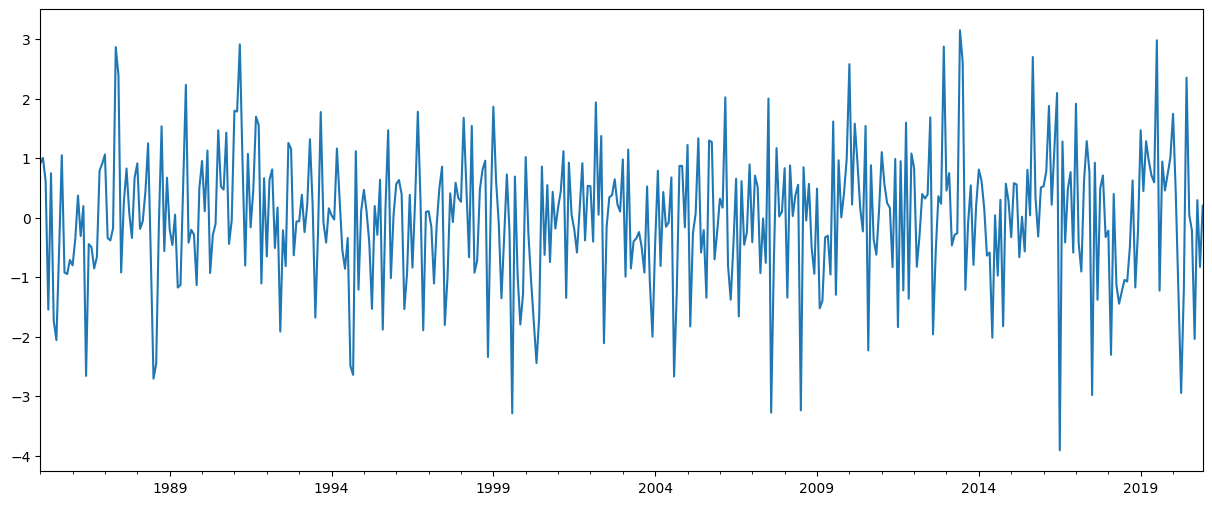

In [81]:
residuos = resultado.resid
# print(resultado.resid)
residuos.plot()
plt.show()

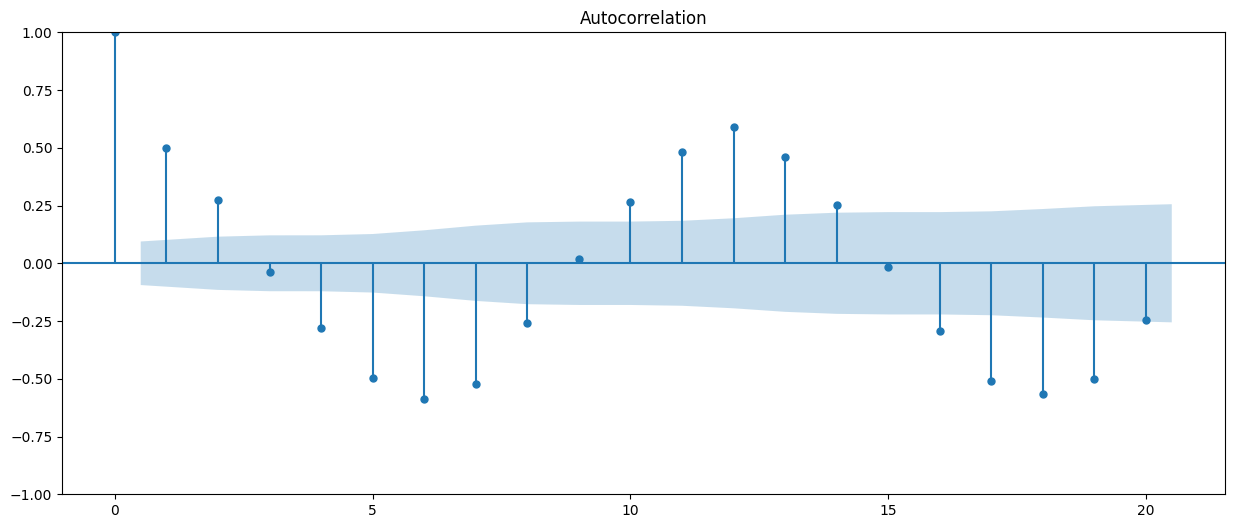

In [82]:
plot_acf(transf_serie_to_raiz_cubica, lags=20)
plt.show()

onde encontrar os pontos que devemos testar no nosso modelo

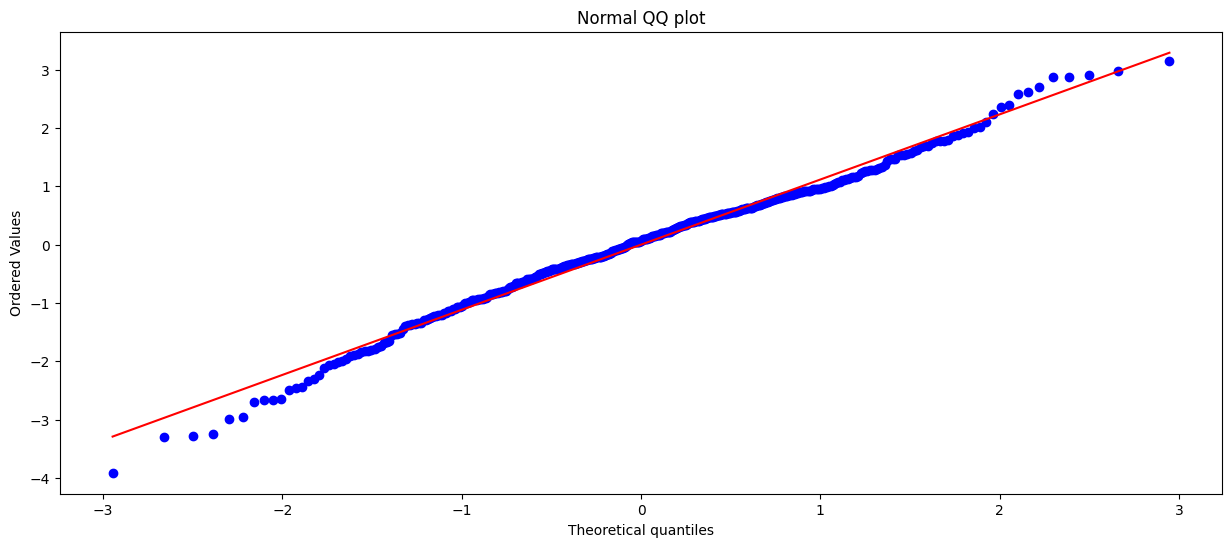

In [83]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [84]:
e, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.989482581615448
p-valor: 0.003431787248700857


/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


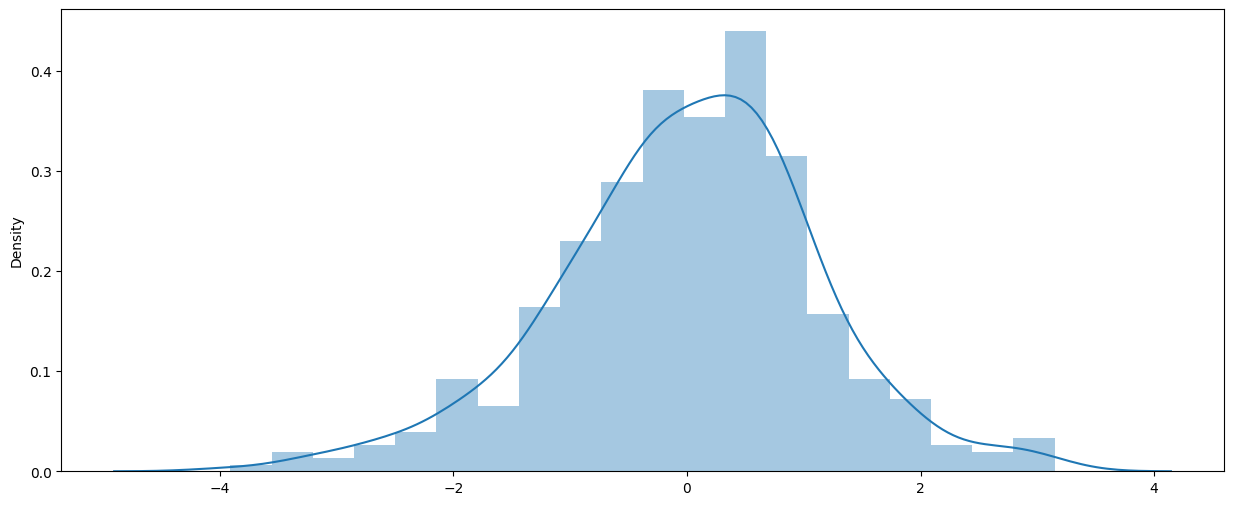

In [85]:
import seaborn as sns
sns.distplot(residuos);

# Autocorrelação

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

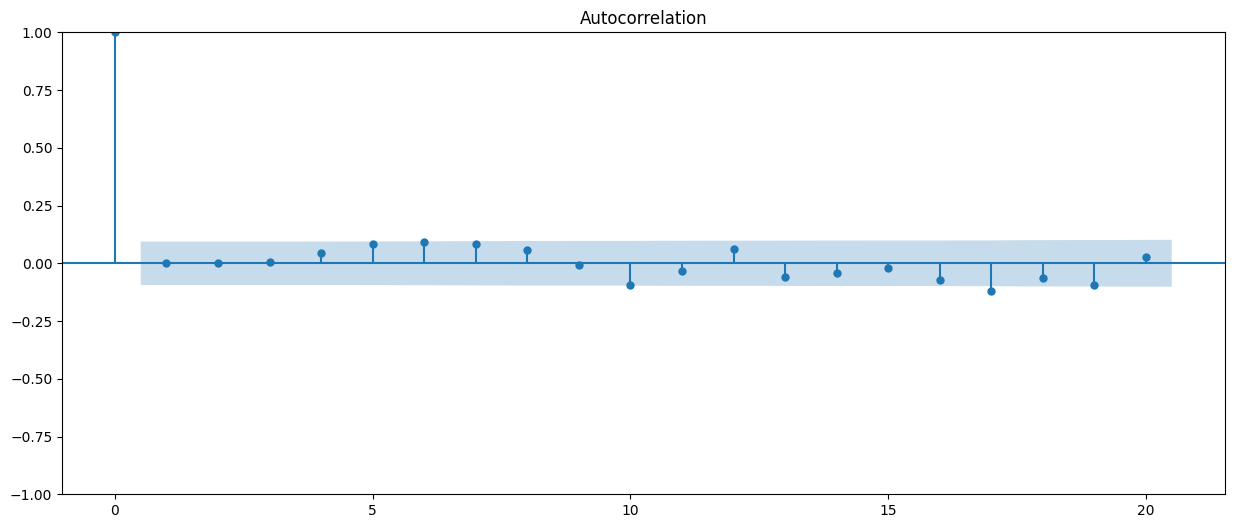

In [87]:
plot_acf(residuos, lags=20)
plt.show()

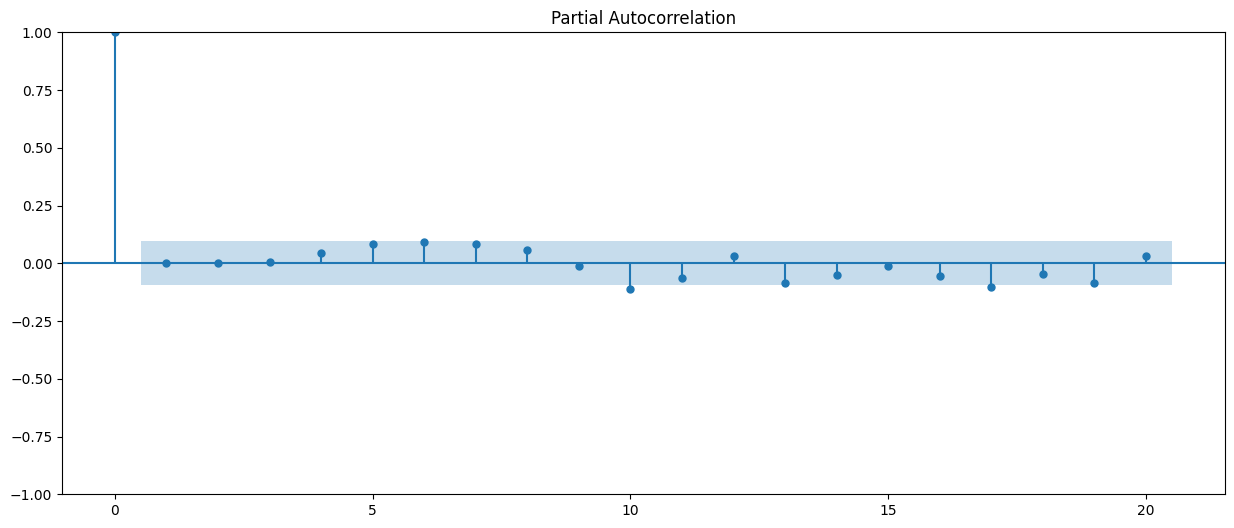

In [88]:
plot_pacf(residuos, lags=20)
plt.show()

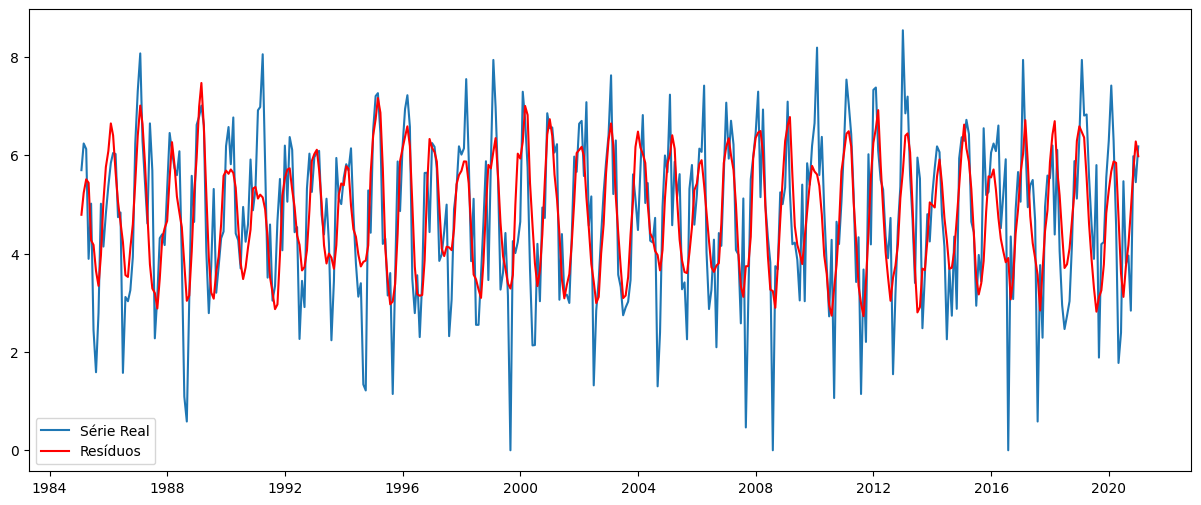

In [89]:
plt.plot(transf_serie_to_raiz_cubica, label='Série Real')
plt.plot(transf_serie_to_raiz_cubica-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [90]:
previsao = resultado.predict(431, end = 443)# inicio e fim do intervalo para predizer
previsao

2020-12-31    5.979713
2021-01-31    5.414673
2021-02-28    5.529483
2021-03-31    5.262915
2021-04-30    4.794289
2021-05-31    4.056848
2021-06-30    3.861010
2021-07-31    3.910533
2021-08-31    4.196675
2021-09-30    4.499026
2021-10-31    4.877657
2021-11-30    5.266748
2021-12-31    5.528982
Freq: M, Name: predicted_mean, dtype: float64

In [91]:
previsao = resultado.forecast(12) # qtd de valores apos a ultima data
previsao

2021-01-31    5.414673
2021-02-28    5.529483
2021-03-31    5.262915
2021-04-30    4.794289
2021-05-31    4.056848
2021-06-30    3.861010
2021-07-31    3.910533
2021-08-31    4.196675
2021-09-30    4.499026
2021-10-31    4.877657
2021-11-30    5.266748
2021-12-31    5.528982
Freq: M, Name: predicted_mean, dtype: float64

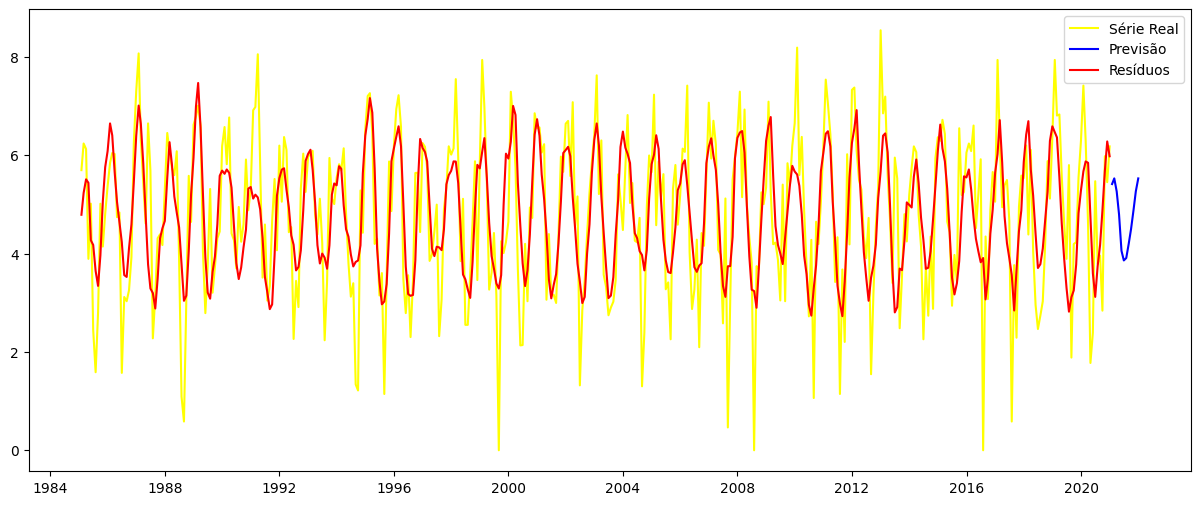

In [92]:
plt.plot(transf_serie_to_raiz_cubica,color='yellow', label='Série Real')
plt.plot(previsao,color='blue', label='Previsão')
plt.plot(transf_serie_to_raiz_cubica-residuos,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [93]:
previsao

2021-01-31    5.414673
2021-02-28    5.529483
2021-03-31    5.262915
2021-04-30    4.794289
2021-05-31    4.056848
2021-06-30    3.861010
2021-07-31    3.910533
2021-08-31    4.196675
2021-09-30    4.499026
2021-10-31    4.877657
2021-11-30    5.266748
2021-12-31    5.528982
Freq: M, Name: predicted_mean, dtype: float64

In [94]:
# reverte para o valor original, lembra que tiramos raiz cubica?
prev = (previsao)**3

prev_escala = pd.DataFrame()

prev_escala['Previsão_AR'] = prev

prev_escala

Previsão_AR
2021-01-31   158.751101
2021-02-28   169.064910
2021-03-31   145.773686
2021-04-30   110.197696
2021-05-31    66.767671
2021-06-30    57.557623
2021-07-31    59.800920
2021-08-31    73.912205
2021-09-30    91.065833
2021-10-31   116.046949
2021-11-30   146.092374
2021-12-31   169.019029

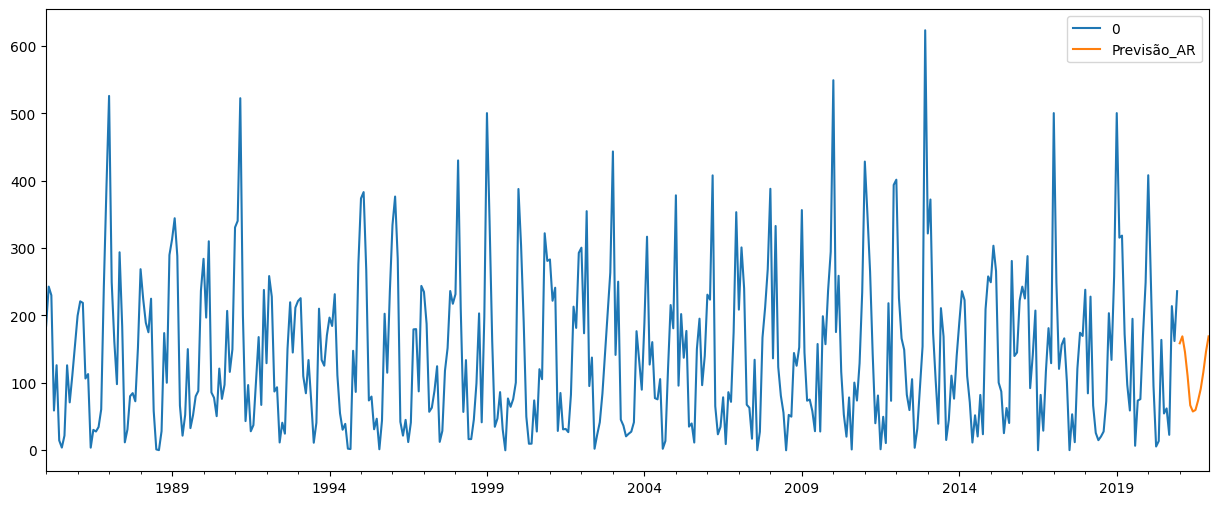

In [95]:
pd.concat([serie5,prev_escala]).plot();

# Modelo MA

Modelo arima:(p,d,q)

Modelo ma: (0,0,q)

1. p -> ordem autoregressiva
2. d -> diferenciacao
3. q -> ordem da media movel

In [96]:
from statsmodels.tsa.arima.model import ARIMA

In [97]:
modelo_ma = ARIMA(transf_serie_to_raiz_cubica, order = (0,0,8))

In [98]:
resultado_ma = modelo_ma.fit()
print(resultado_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -698.685
Date:                Mon, 15 Apr 2024   AIC                           1417.371
Time:                        19:53:10   BIC                           1458.055
Sample:                    01-31-1985   HQIC                          1433.433
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7944      0.026    182.518      0.000       4.743       4.846
ma.L1          0.3103      0.052      5.972      0.000       0.208       0.412
ma.L2          0.2198      0.051      4.335      0.0

### **Análise dos Resíduos**

In [99]:
residuos_ma = resultado_ma.resid

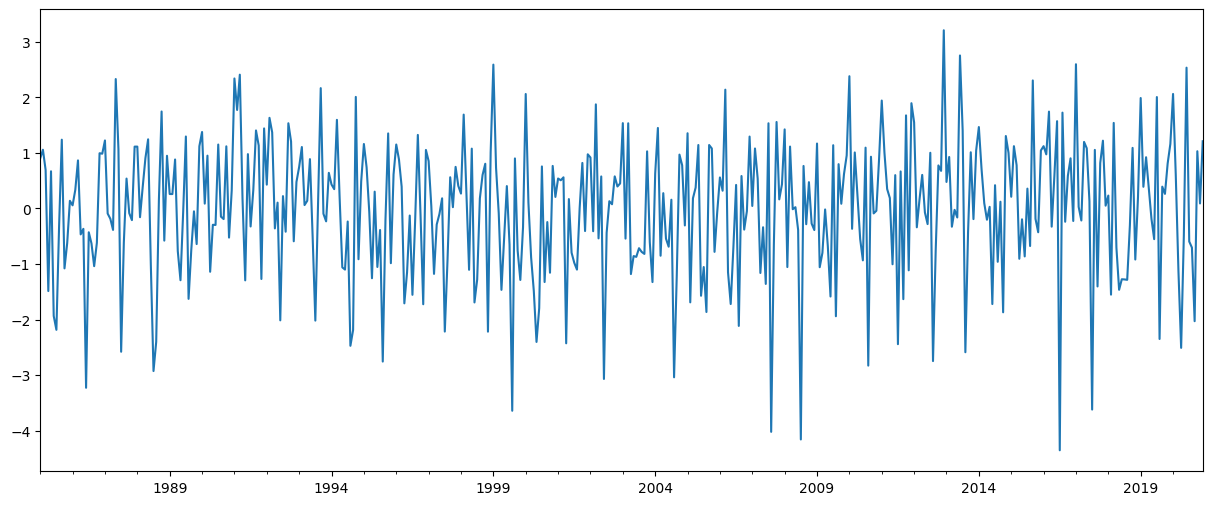

In [100]:
residuos_ma.plot()
plt.show()

**Normalidade**

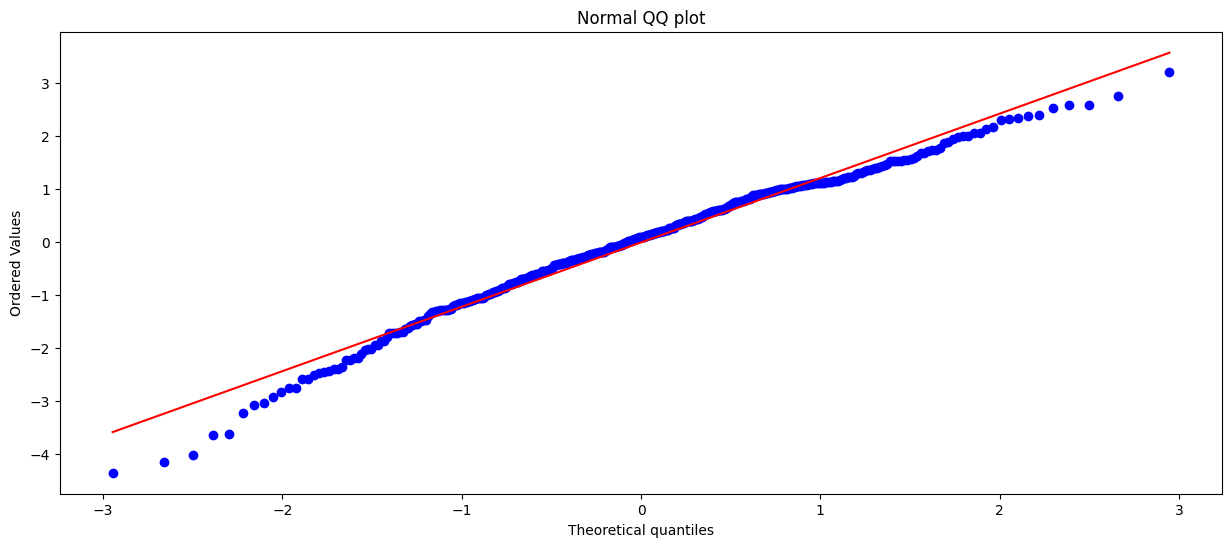

In [101]:
stats.probplot(residuos_ma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [102]:
e, p = stats.shapiro(residuos_ma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9819052219390869
p-valor: 3.179716077283956e-05


/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


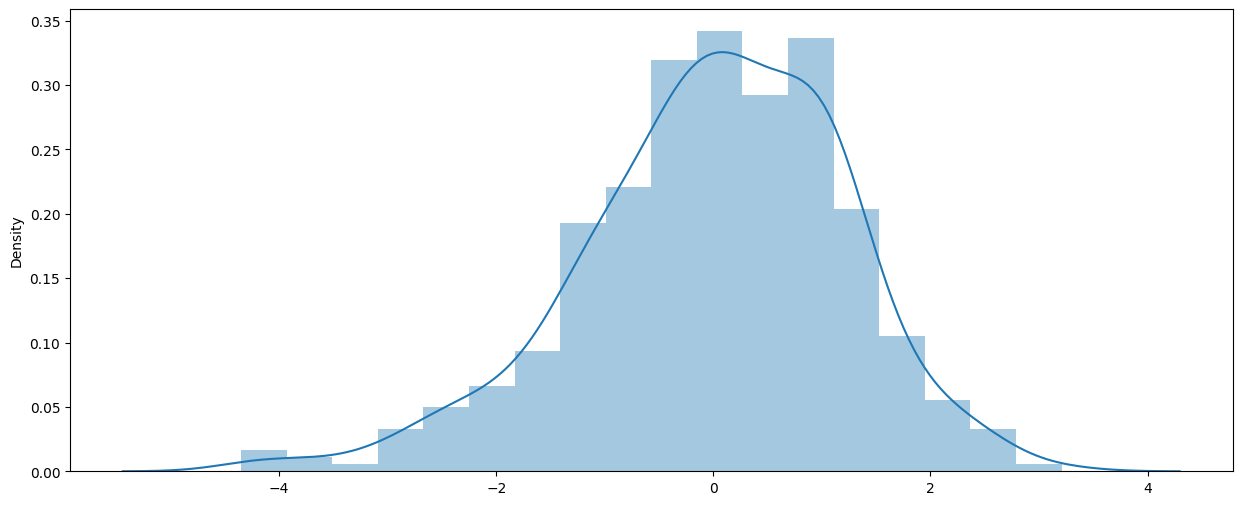

In [103]:
import seaborn as sns
sns.distplot(residuos_ma);

**Autocorrelação**

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

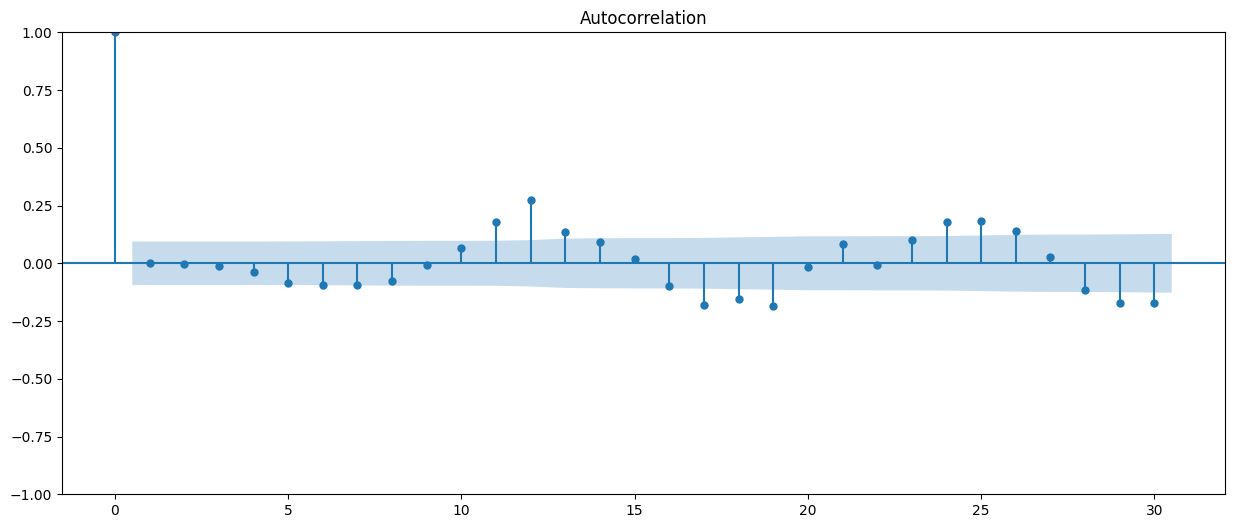

In [105]:
plot_acf(residuos_ma, lags=30)
plt.show()

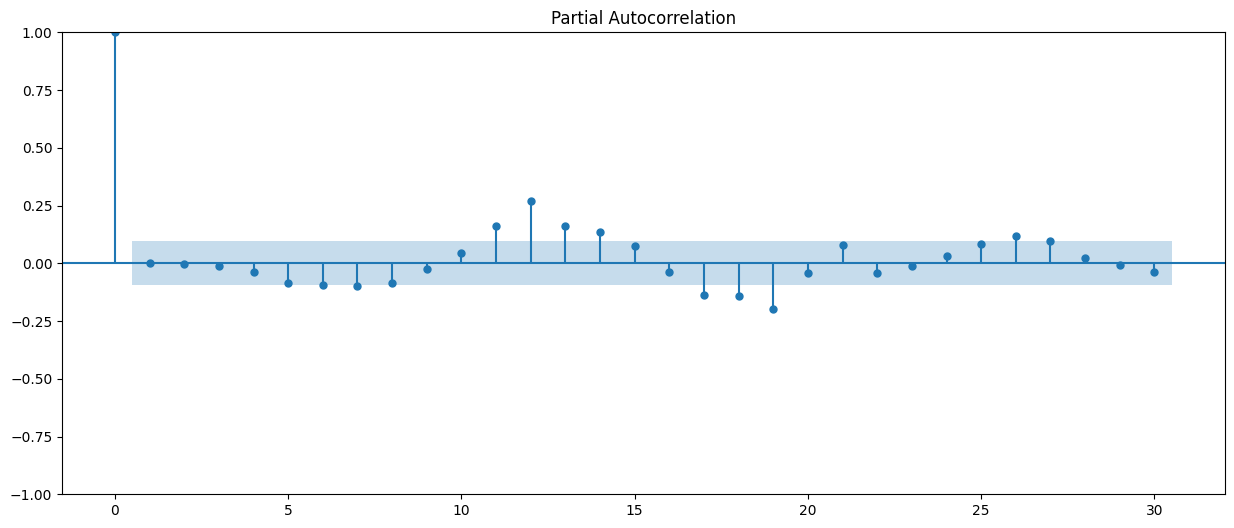

In [106]:
plot_pacf(residuos_ma, lags=30)
plt.show()

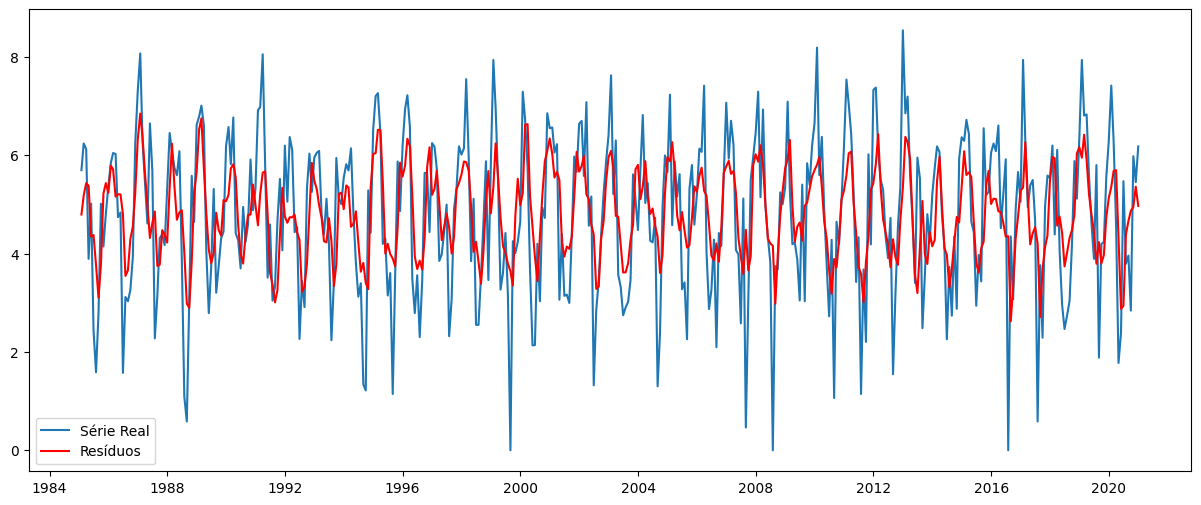

In [107]:
plt.plot(transf_serie_to_raiz_cubica, label='Série Real')
plt.plot(transf_serie_to_raiz_cubica-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [108]:
resultado_ma.fittedvalues

1985-01-31    4.794377
1985-02-28    5.182213
1985-03-31    5.433078
1985-04-30    5.379246
1985-05-31    4.346217
                ...   
2020-08-31    4.664641
2020-09-30    4.868579
2020-10-31    4.950001
2020-11-30    5.361765
2020-12-31    4.969374
Freq: M, Length: 432, dtype: float64

In [109]:
previsao_ma = resultado_ma.predict(start=430, end=443)
previsao_ma

2020-11-30    5.361765
2020-12-31    4.969374
2021-01-31    4.922357
2021-02-28    5.496404
2021-03-31    5.489549
2021-04-30    5.089062
2021-05-31    4.398518
2021-06-30    4.255745
2021-07-31    4.369451
2021-08-31    4.649519
2021-09-30    4.794377
2021-10-31    4.794377
2021-11-30    4.794377
2021-12-31    4.794377
Freq: M, Name: predicted_mean, dtype: float64

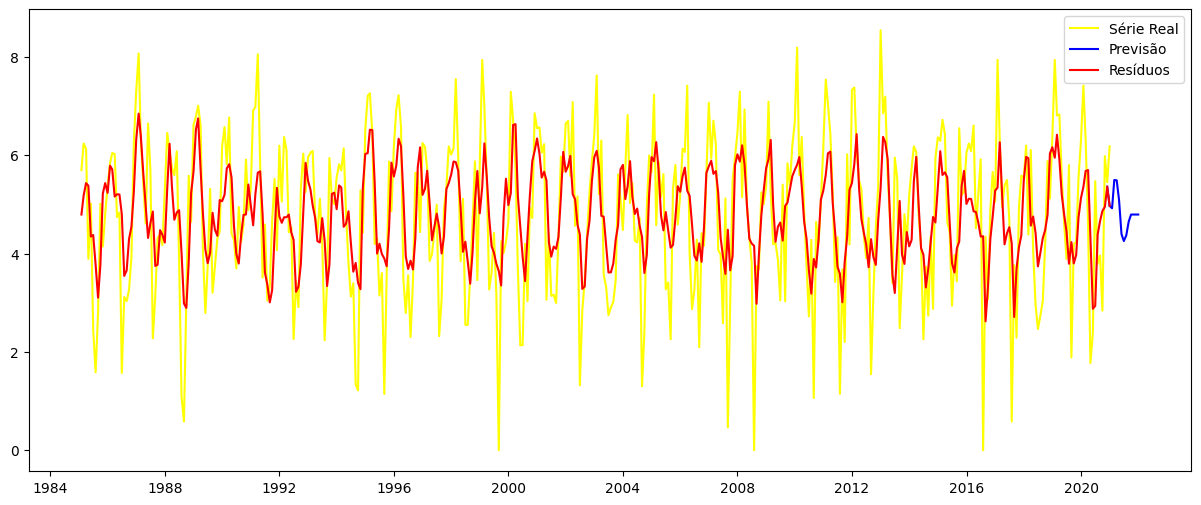

In [110]:
plt.plot(transf_serie_to_raiz_cubica,color='yellow', label='Série Real')
plt.plot(previsao_ma,color='blue', label='Previsão')
plt.plot(transf_serie_to_raiz_cubica-residuos_ma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [111]:
prev = previsao_ma ** 3

#(previsao_ma ** 3, columns=['Previsão_MA'])
prev_escala_ma = pd.DataFrame()

prev_escala_ma['Previsão_MA'] = prev
prev_escala_ma

Previsão_MA
2020-11-30   154.142836
2020-12-31   122.717078
2021-01-31   119.266722
2021-02-28   166.048847
2021-03-31   165.428342
2021-04-30   131.799342
2021-05-31    85.097965
2021-06-30    77.077330
2021-07-31    83.422019
2021-08-31   100.513458
2021-09-30   110.203780
2021-10-31   110.203780
2021-11-30   110.203780
2021-12-31   110.203780

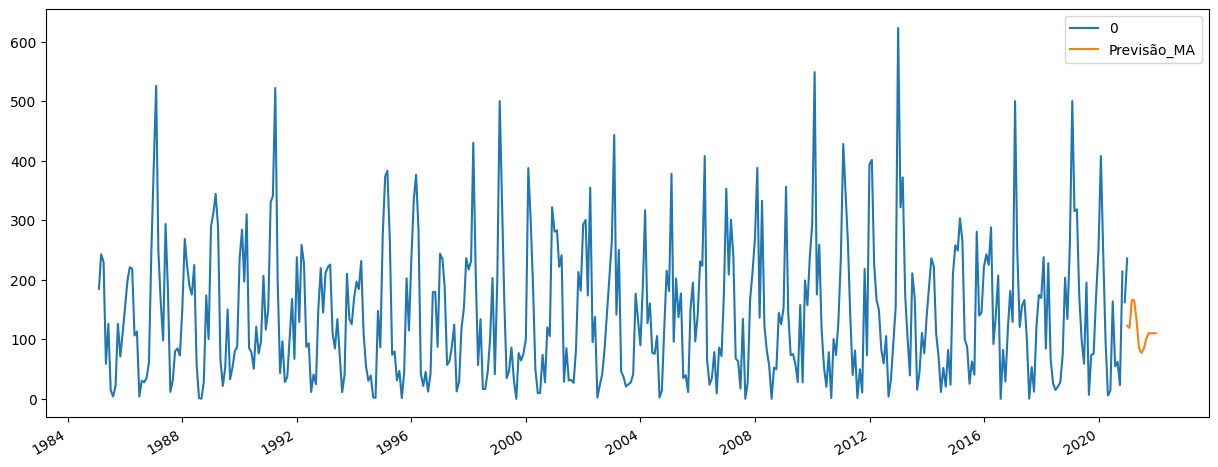

In [113]:
pd.concat([serie5,prev_escala_ma]).plot();

# ARMA

Modelo arima:(p,d,q)

Modelo arma: (p,0,q)

In [114]:
from statsmodels.tsa.arima.model import ARIMA

In [115]:
modelo_arma = ARIMA(transf_serie_to_raiz_cubica, order = (10,0,2))

In [116]:
resultado_arma = modelo_arma.fit()
print(resultado_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                ARIMA(10, 0, 2)   Log Likelihood                -658.004
Date:                Mon, 15 Apr 2024   AIC                           1344.009
Time:                        19:55:19   BIC                           1400.967
Sample:                    01-31-1985   HQIC                          1366.496
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7871      0.046    103.949      0.000       4.697       4.877
ar.L1          0.0137      0.394      0.035      0.972      -0.759       0.787
ar.L2          0.7324      0.346      2.118      0.0

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# comparacao de resultados de modelos:

Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

### **Análise dos Resíduos**

In [117]:
residuos_arma = resultado_arma.resid

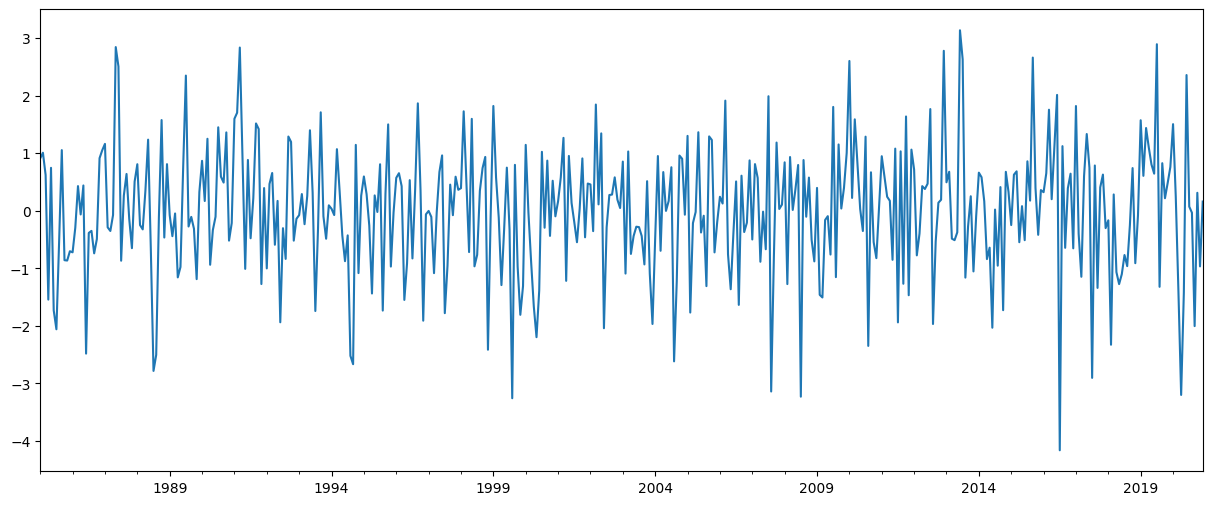

In [118]:
residuos_arma.plot()
plt.show()

**Normalidade**

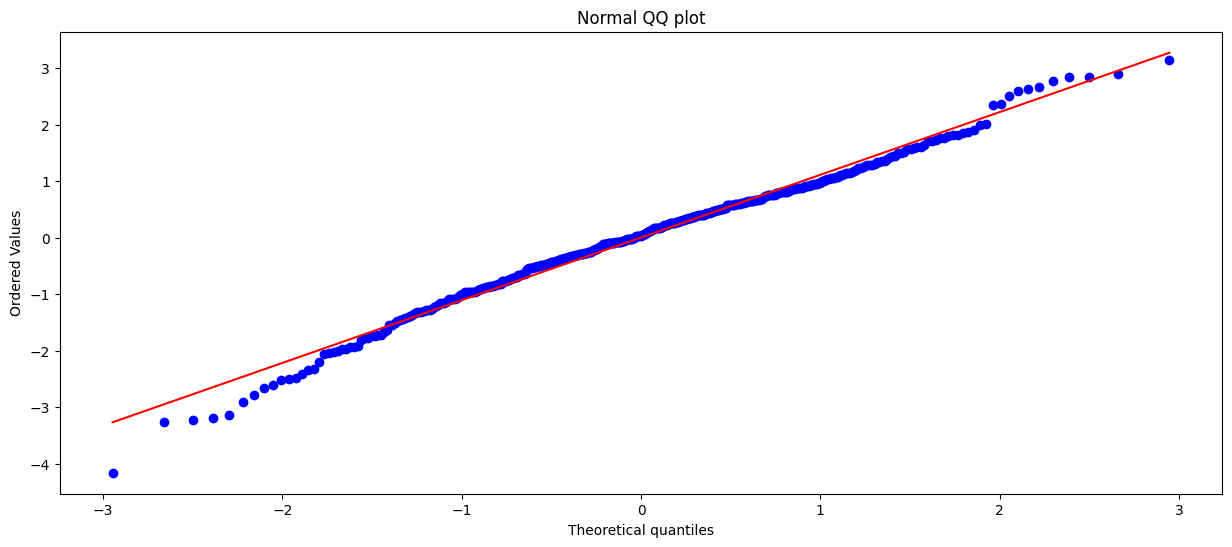

In [119]:
stats.probplot(residuos_arma, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [120]:
e, p = stats.shapiro(residuos_arma)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9887235760688782
p-valor: 0.0020537450909614563


/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


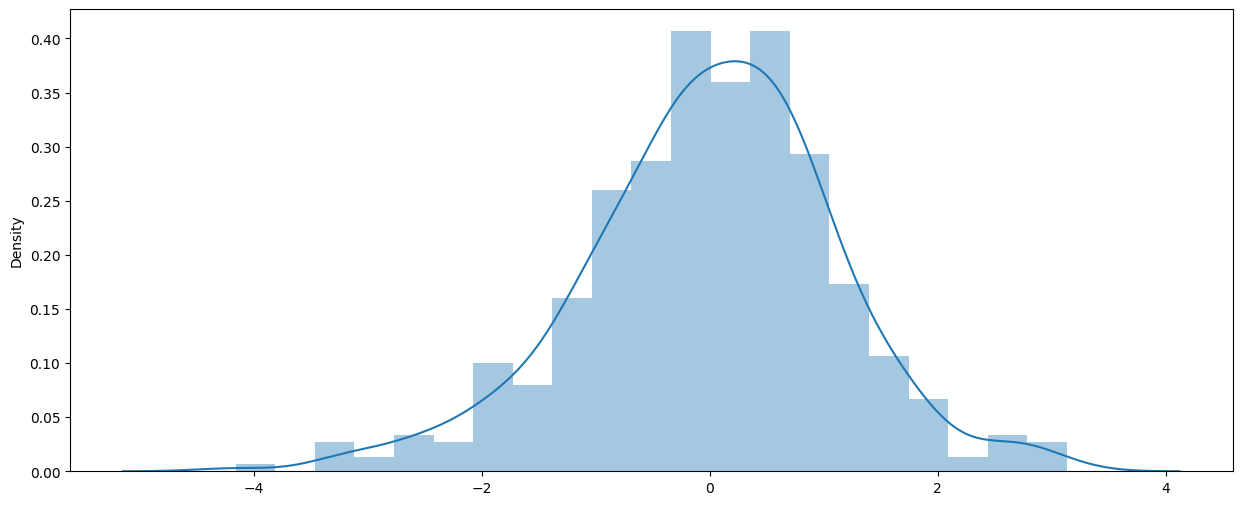

In [121]:
import seaborn as sns
sns.distplot(residuos_arma);

**Autocorrelação**

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

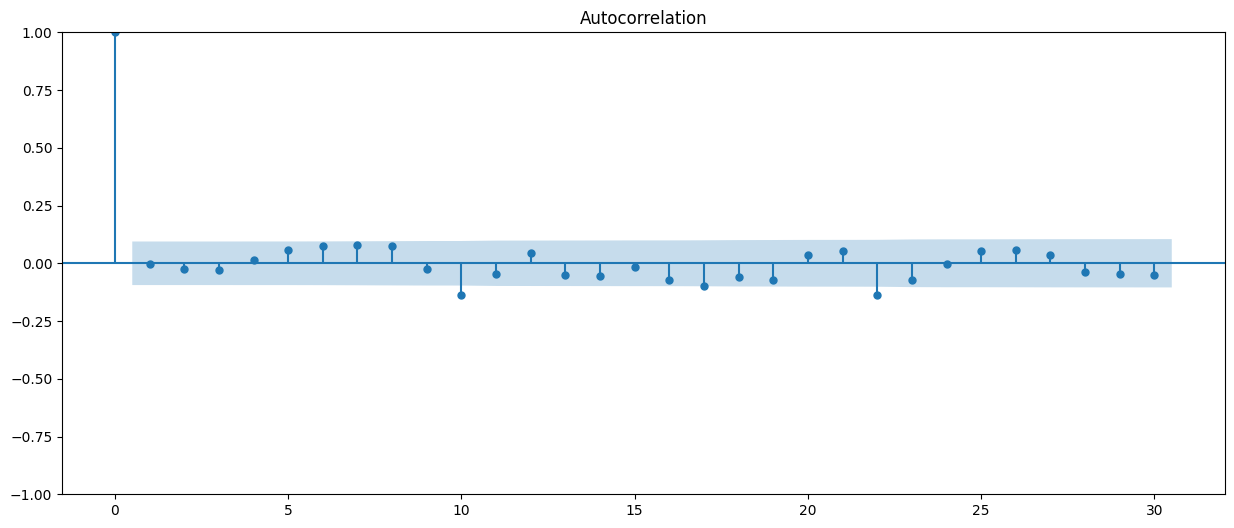

In [123]:
plot_acf(residuos_arma, lags=30)
plt.show()

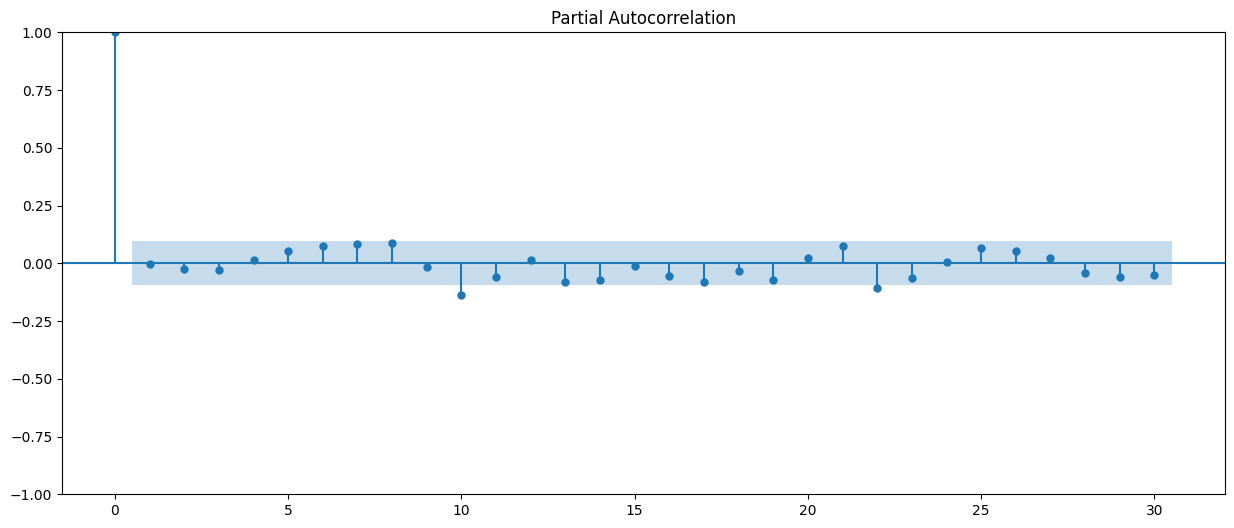

In [124]:
plot_pacf(residuos_arma, lags=30)
plt.show()

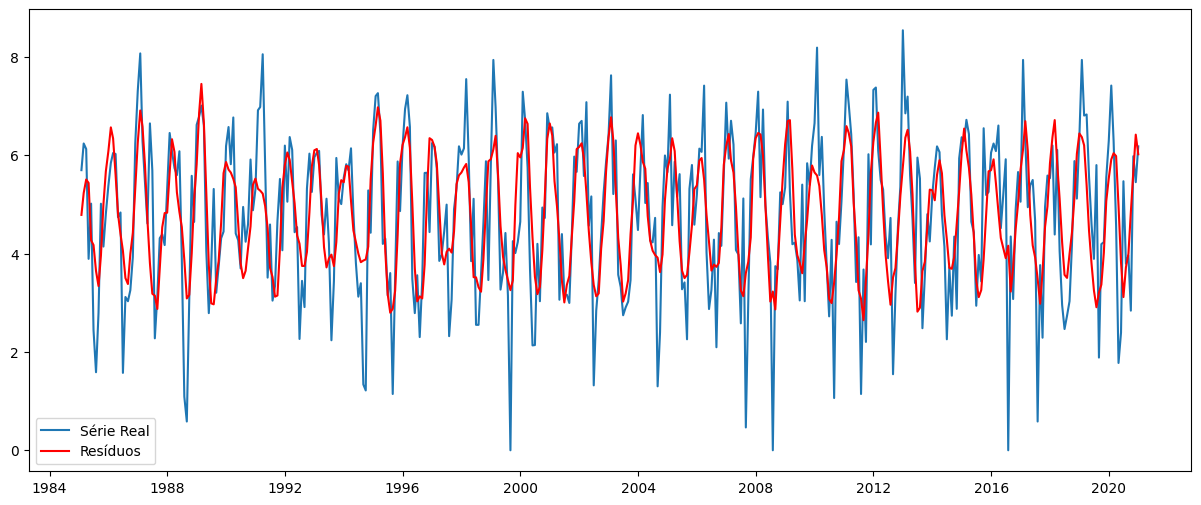

In [125]:
plt.plot(transf_serie_to_raiz_cubica, label='Série Real')
plt.plot(transf_serie_to_raiz_cubica-residuos_arma,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [126]:
resultado_arma.fittedvalues

1985-01-31    4.787132
1985-02-28    5.232530
1985-03-31    5.506879
1985-04-30    5.436289
1985-05-31    4.270995
                ...   
2020-08-31    3.994566
2020-09-30    4.843497
2020-10-31    5.669244
2020-11-30    6.419318
2020-12-31    6.020465
Freq: M, Length: 432, dtype: float64

In [127]:
previsao_arma = resultado_arma.predict(start=431, end=455)
previsao_arma

2020-12-31    6.020465
2021-01-31    5.376591
2021-02-28    5.242595
2021-03-31    5.129011
2021-04-30    4.692834
2021-05-31    4.020071
2021-06-30    3.761498
2021-07-31    3.862907
2021-08-31    4.291254
2021-09-30    4.611629
2021-10-31    5.033067
2021-11-30    5.303538
2021-12-31    5.596610
2022-01-31    5.526202
2022-02-28    5.314085
2022-03-31    4.886777
2022-04-30    4.558775
2022-05-31    4.247930
2022-06-30    4.140096
2022-07-31    4.139124
2022-08-31    4.365984
2022-09-30    4.658524
2022-10-31    5.012098
2022-11-30    5.242964
2022-12-31    5.373902
Freq: M, Name: predicted_mean, dtype: float64

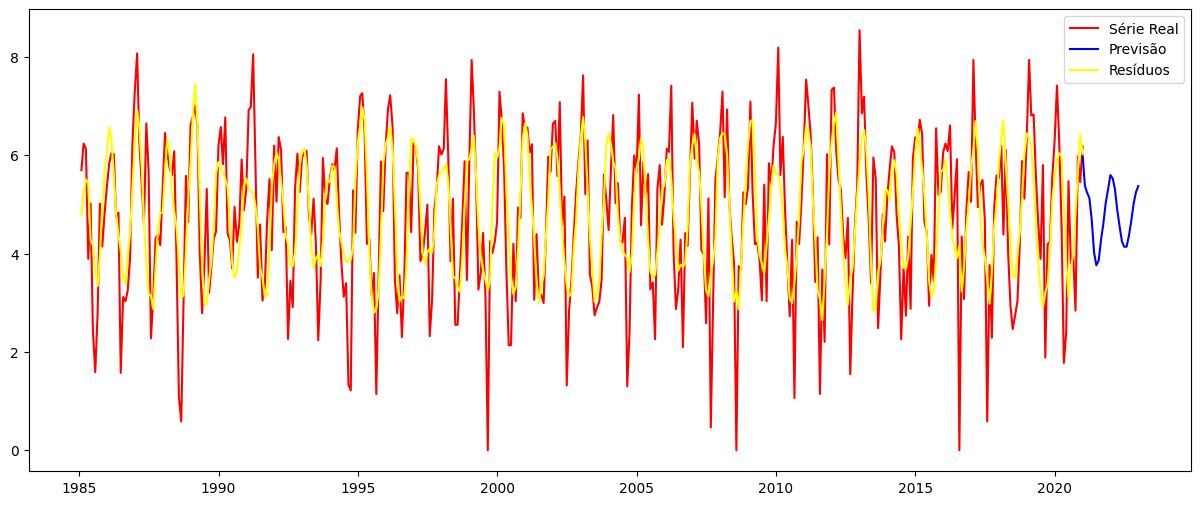

In [128]:
plt.plot(transf_serie_to_raiz_cubica,color='red', label='Série Real')
plt.plot(previsao_arma,color='blue', label='Previsão')
plt.plot(transf_serie_to_raiz_cubica-residuos_arma,color='yellow', label='Resíduos')
plt.legend(loc='best')
plt.show()

In [129]:

#previsao_arma ** 3, columns=['Previsão_ARMA']

prev_escala_arma = pd.DataFrame()
prev_escala_arma['Previsão_ARMA'] = previsao_arma ** 3
prev_escala_arma

Previsão_ARMA
2020-12-31     218.217766
2021-01-31     155.425082
2021-02-28     144.091687
2021-03-31     134.927654
2021-04-30     103.348801
2021-05-31      64.968237
2021-06-30      53.220917
2021-07-31      57.642491
2021-08-31      79.022831
2021-09-30      98.076085
2021-10-31     127.496430
2021-11-30     149.175375
2021-12-31     175.297263
2022-01-31     168.764174
2022-02-28     150.067119
2022-03-31     116.699129
2022-04-30      94.742403
2022-05-31      76.653514
2022-06-30      70.962886
2022-07-31      70.912893
2022-08-31      83.223568
2022-09-30     101.098538
2022-10-31     125.909511
2022-11-30     144.122090
2022-12-31     155.191996

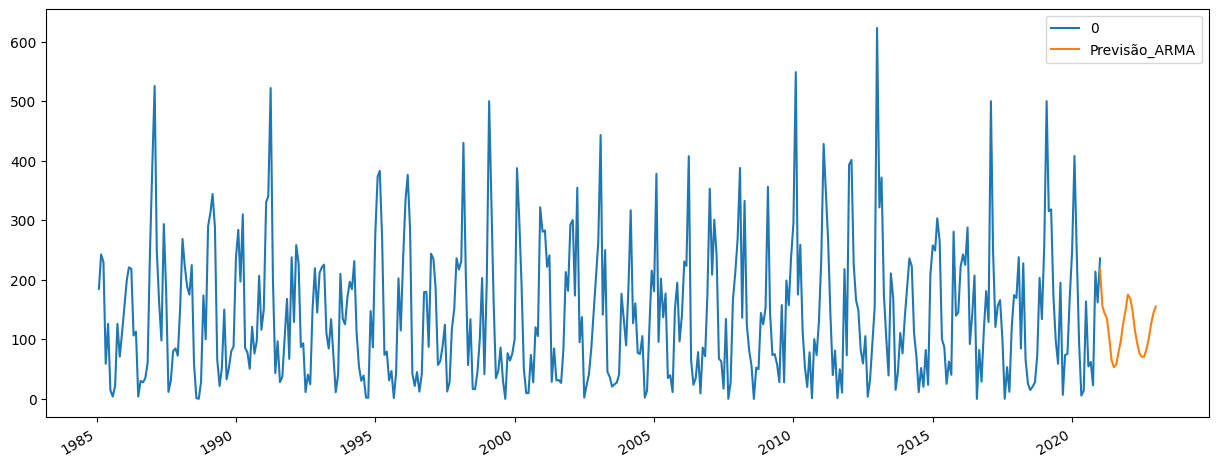

In [130]:
pd.concat([serie5,prev_escala_arma]).plot();

# ARIMA

Modelo arima:(p,d,q)

Modelo AR: AIC = 1337.922 (9,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

In [131]:
from statsmodels.tsa.arima.model import ARIMA

In [132]:
modelo_arima = ARIMA(transf_serie_to_raiz_cubica, order = (10,1,2))

In [133]:
resultado_arima = modelo_arima.fit()
print(resultado_arima.summary())

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  432
Model:                ARIMA(10, 1, 2)   Log Likelihood                -655.036
Date:                Mon, 15 Apr 2024   AIC                           1336.073
Time:                        19:55:25   BIC                           1388.932
Sample:                    01-31-1985   HQIC                          1356.943
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6988      0.073      9.637      0.000       0.557       0.841
ar.L2         -0.2308      0.067     -3.456      0.001      -0.362      -0.100
ar.L3         -0.3023      0.073     -4.119      0.0

/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Modelo AR: Melhor AIC = 1339.919 (10,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

### **Análise dos Resíduos**

In [134]:
residuos_arima = resultado_arima.resid

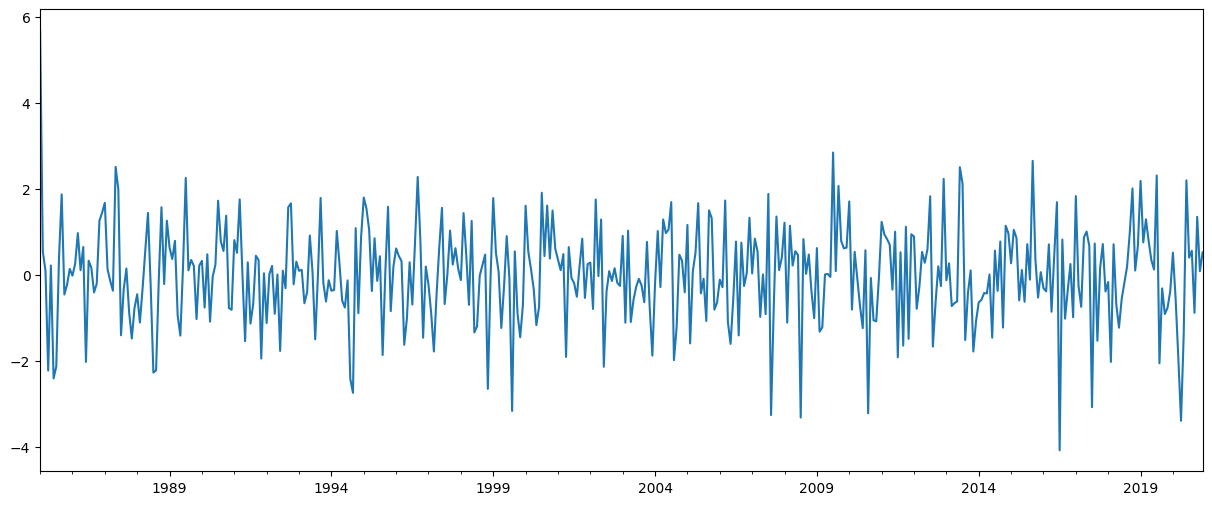

In [135]:
residuos_arima.plot()
plt.show()

**Normalidade**

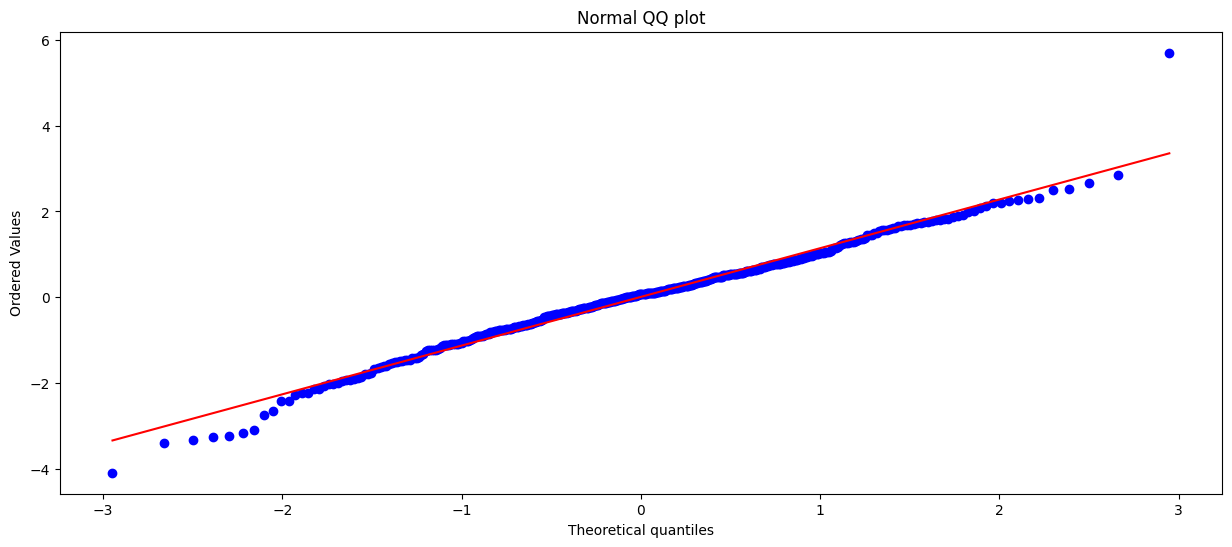

In [136]:
stats.probplot(residuos_arima, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [137]:
e, p = stats.shapiro(residuos_arima)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9829676151275635
p-valor: 5.7966401072917506e-05


/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


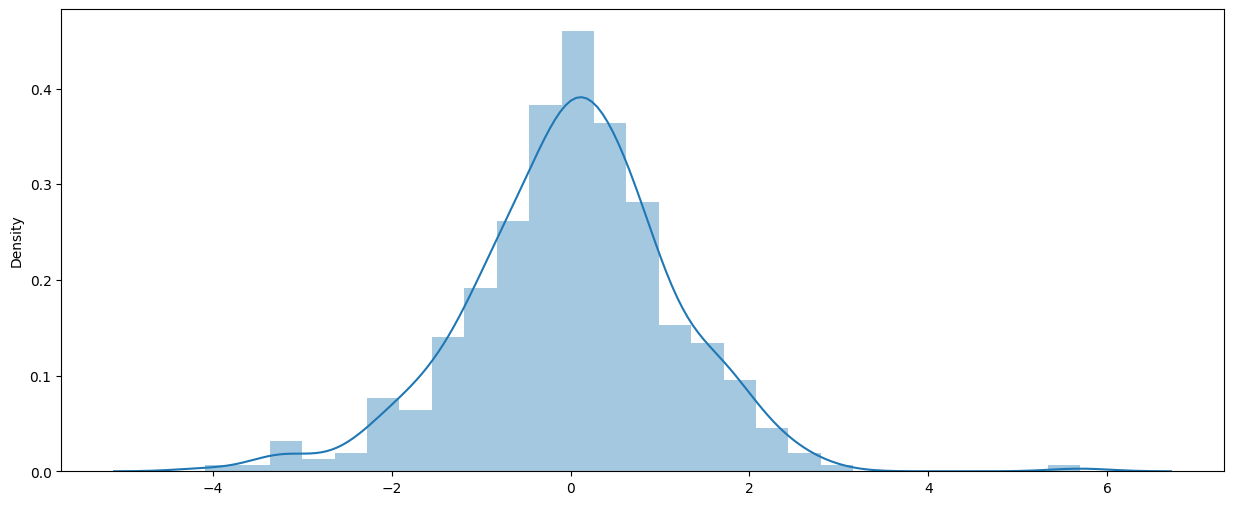

In [138]:
import seaborn as sns
sns.distplot(residuos_arima);

**Autocorrelação**

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

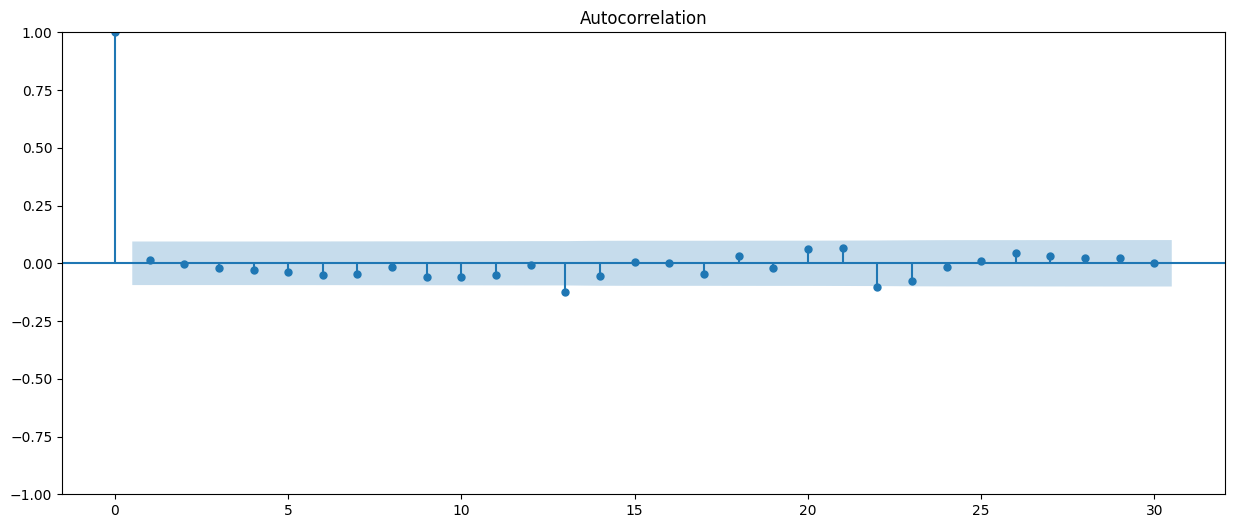

In [140]:
plot_acf(residuos_arima, lags=30)
plt.show()

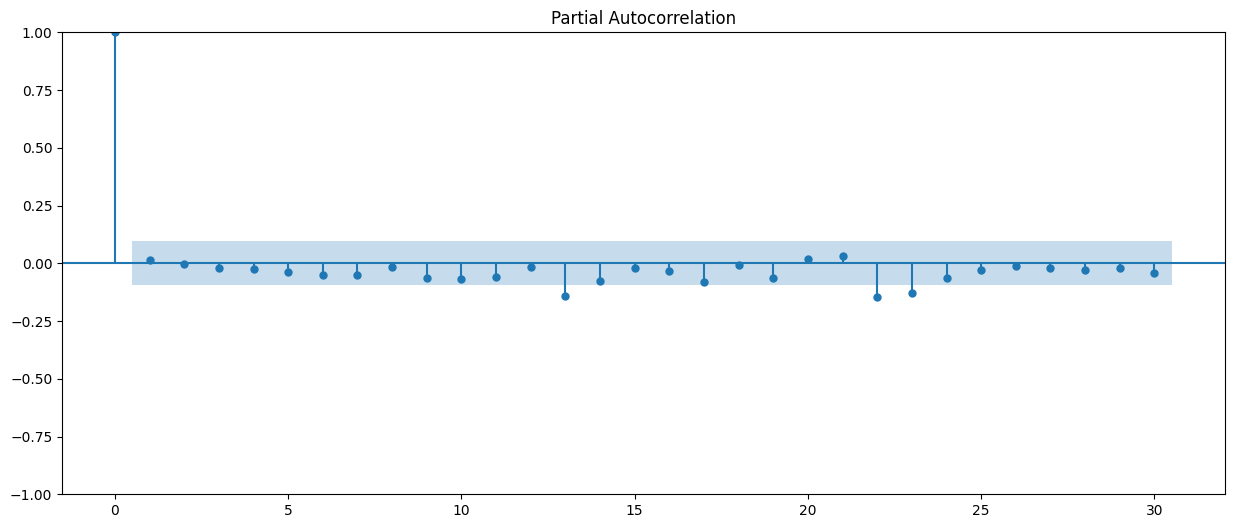

In [141]:
plot_pacf(residuos_arima, lags=30)
plt.show()

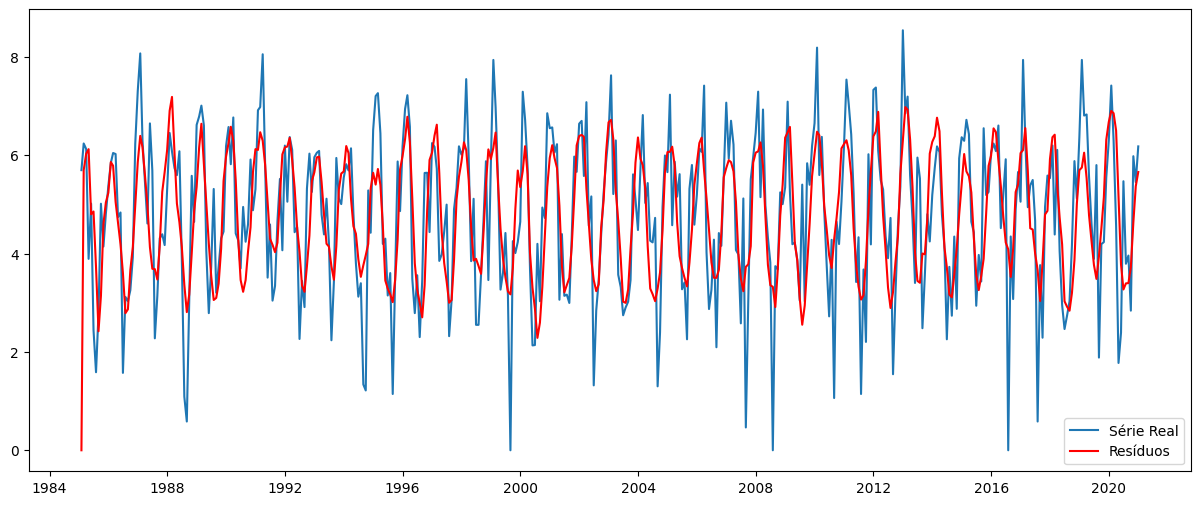

In [142]:
plt.plot(transf_serie_to_raiz_cubica, label='Série Real')
plt.plot(transf_serie_to_raiz_cubica-residuos_arima,color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [143]:
resultado_arima.fittedvalues

1985-01-31    0.000000
1985-02-28    5.696987
1985-03-31    6.031956
1985-04-30    6.124083
1985-05-31    4.798856
                ...   
2020-08-31    3.399988
2020-09-30    3.724557
2020-10-31    4.629204
2020-11-30    5.368633
2020-12-31    5.659401
Freq: M, Length: 432, dtype: float64

In [144]:
previsao_arima = resultado_arima.predict(start=430, end=443)
previsao_arima

2020-11-30    5.368633
2020-12-31    5.659401
2021-01-31    5.546183
2021-02-28    5.989396
2021-03-31    5.514443
2021-04-30    4.523563
2021-05-31    3.599896
2021-06-30    3.346825
2021-07-31    3.547841
2021-08-31    3.769078
2021-09-30    4.290917
2021-10-31    4.965890
2021-11-30    5.696879
2021-12-31    6.032602
Freq: M, Name: predicted_mean, dtype: float64

In [163]:
# # Linha TESTE  previsao_arima, columns=['Previsão_ARIMA']
prev_arima = pd.DataFrame()
prev_arima['Previsão_ARIMA'] = previsao_arima
prev_arima['Previsão_ARIMA']

2020-11-30    5.368633
2020-12-31    5.659401
2021-01-31    5.546183
2021-02-28    5.989396
2021-03-31    5.514443
2021-04-30    4.523563
2021-05-31    3.599896
2021-06-30    3.346825
2021-07-31    3.547841
2021-08-31    3.769078
2021-09-30    4.290917
2021-10-31    4.965890
2021-11-30    5.696879
2021-12-31    6.032602
Freq: M, Name: Previsão_ARIMA, dtype: float64

In [164]:
len(prev_arima['Previsão_ARIMA'])

14

In [165]:
soma = np.cumsum(prev_arima['Previsão_ARIMA'][::-1])
soma

2021-12-31     6.032602
2021-11-30    11.729480
2021-10-31    16.695370
2021-09-30    20.986288
2021-08-31    24.755366
2021-07-31    28.303207
2021-06-30    31.650031
2021-05-31    35.249927
2021-04-30    39.773490
2021-03-31    45.287933
2021-02-28    51.277329
2021-01-31    56.823512
2020-12-31    62.482913
2020-11-30    67.851547
Freq: -1M, Name: Previsão_ARIMA, dtype: float64

In [166]:
reversao = []
for i in range(1,len(prev_arima['Previsão_ARIMA'])):
  reversao.append (prev_arima['Previsão_ARIMA'][-1]-soma[-i])
reversao.append(prev_arima['Previsão_ARIMA'][-1])
print(reversao)

# LINHA TESTE
#arima_log_diff_rev = []
#v_prev = 0
#for v in prev_arima['Previsão_ARIMA']:
    #v_prev += v
    #arima_log_diff_rev.append(v_prev)


#prev_arima['Previsão_ARIMA']=(prev_arima['Previsão_ARIMA'].cumsum())*ultimo
#prev_arima

[-61.81894495880904, -56.450311574910025, -50.79091034094926, -45.24472706293342, -39.255331356402465, -33.740888260125345, -29.217325595739027, -25.617429551437272, -22.27060496279332, -18.72276405235711, -14.953686156873815, -10.662768686144943, -5.696878695836278, 6.0326017797544855]


In [167]:
#df['energy']=(np.exp(df['energy'].cumsum())*last_energy)
ultimo = prev_arima['Previsão_ARIMA'].iloc[-1]
prev_arima['Previsão_ARIMA']=(prev_arima['Previsão_ARIMA'].cumsum()*ultimo)
prev_arima

Previsão_ARIMA
2020-11-30       32.386827
2020-12-31       66.527741
2021-01-31       99.985656
2021-02-28      136.117296
2021-03-31      169.383735
2021-04-30      196.672587
2021-05-31      218.389326
2021-06-30      238.579386
2021-07-31      259.982098
2021-08-31      282.719444
2021-09-30      308.604840
2021-10-31      338.562077
2021-11-30      372.929077
2021-12-31      409.321362

In [168]:
previsao_arima2 = resultado_arima.forecast(24)
previsao_arima2

2021-01-31    5.546183
2021-02-28    5.989396
2021-03-31    5.514443
2021-04-30    4.523563
2021-05-31    3.599896
2021-06-30    3.346825
2021-07-31    3.547841
2021-08-31    3.769078
2021-09-30    4.290917
2021-10-31    4.965890
2021-11-30    5.696879
2021-12-31    6.032602
2022-01-31    5.988658
2022-02-28    5.660190
2022-03-31    5.156360
2022-04-30    4.511090
2022-05-31    3.891920
2022-06-30    3.515813
2022-07-31    3.497848
2022-08-31    3.813423
2022-09-30    4.349937
2022-10-31    4.987688
2022-11-30    5.569266
2022-12-31    5.929129
Freq: M, Name: predicted_mean, dtype: float64

In [169]:

#previsao_arima2[0] ** 3, columns=['Previsão_ARIMA'])
prev_escala_arima = pd.DataFrame()
prev_escala_arima['Previsão_ARIMA'] = previsao_arima2 ** 3
prev_escala_arima['Previsão_ARIMA']

2021-01-31    170.601424
2021-02-28    214.856759
2021-03-31    167.689156
2021-04-30     92.563940
2021-05-31     46.651958
2021-06-30     37.488568
2021-07-31     44.657295
2021-08-31     53.543325
2021-09-30     79.004256
2021-10-31    122.459162
2021-11-30    184.888933
2021-12-31    219.540159
2022-01-31    214.777356
2022-02-28    181.339710
2022-03-31    137.097566
2022-04-30     91.800377
2022-05-31     58.951076
2022-06-30     43.458764
2022-07-31     42.795978
2022-08-31     55.455525
2022-09-30     82.309314
2022-10-31    124.078852
2022-11-30    172.740362
2022-12-31    208.435957
Freq: M, Name: Previsão_ARIMA, dtype: float64

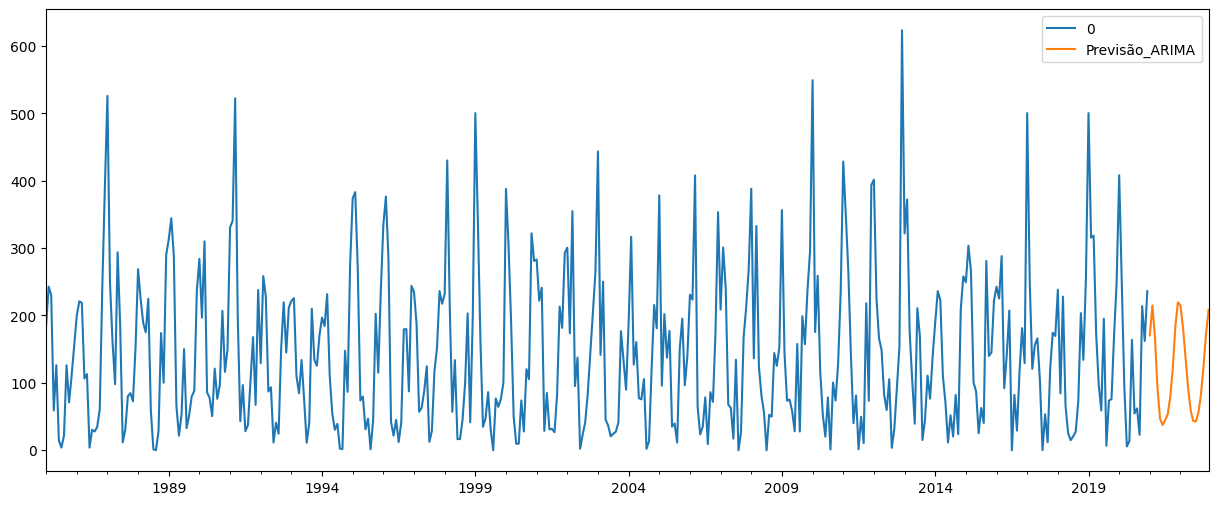

In [170]:
pd.concat([serie5, prev_escala_arima]).plot();

## **Modelo AUTO ARIMA**

Modelo arima:(p,d,q)

Modelo SARIMA: (p,d,q)(P,D,Q)
    
Modelo AR: Melhor AIC = 1337.922 = (9,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

In [171]:
from pmdarima.arima import auto_arima

In [172]:
### AUTOARIMA
modelo_auto = auto_arima(transf_serie_to_raiz_cubica, trace = True, stepwise = False, seasonal=True, max_p=10, max_q=10,
                          max_P=4, max_Q=4, start_p=0, start_q=0, start_P=0, start_Q=0, m=12,)

# Trace: apresenta no console a lista dos modelos.
# stepwise: seleção gradual(processo mais rápido, porém menos minucioso).
# m: período sazonal (neste caso mensal).
# Interessante dobrar as ordens máximas: max.p = 10, max.q = 10, max.P = 4, max.Q = 4

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1625.792, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1510.762, Time=0.13 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1480.536, Time=0.34 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1443.651, Time=0.76 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=1424.659, Time=1.49 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1433.714, Time=0.23 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1278.133, Time=3.46 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=6.99 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1390.693, Time=0.86 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1305.499, Time=2.55 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=4.45 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=2.42 sec
 ARIMA(0,0,0)(3,0,1)[12] 

In [173]:
print(modelo_auto.aic())

1276.667836681261


Modelo AR: Melhor AIC = 1339.919 (10,0,0)

Modelo MA: Melhor AIC = 1411.696 (0,0,8)

Modelo ARMA: Melhor AIC = 1273.766 (10,0,2)

Modelo ARIMA: Melhor AIC = 1319.230 (10,1,2)

Modelo_AUTOARIMA: AIC=1270.5894 ARIMA(0,0,0)(1,0,3)

In [174]:
resultado_auto = modelo_auto.fit(transf_serie_to_raiz_cubica)
print(resultado_auto.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                          y   No. Observations:                  432
Model:             SARIMAX(0, 0, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -631.334
Date:                                    Mon, 15 Apr 2024   AIC                           1276.668
Time:                                            20:00:02   BIC                           1305.147
Sample:                                        01-31-1985   HQIC                          1287.911
                                             - 12-31-2020                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0327      0.021      1.549      0

### **Análise dos Resíduos**

In [175]:
residuos_auto = resultado_auto.resid
residuos_auto()

1985-01-31    0.964136
1985-02-28    1.420035
1985-03-31    1.265627
1985-04-30   -0.954343
1985-05-31    0.369419
                ...   
2020-08-31    1.013974
2020-09-30   -1.242249
2020-10-31    1.328974
2020-11-30    0.055393
2020-12-31    0.152505
Freq: M, Length: 432, dtype: float64

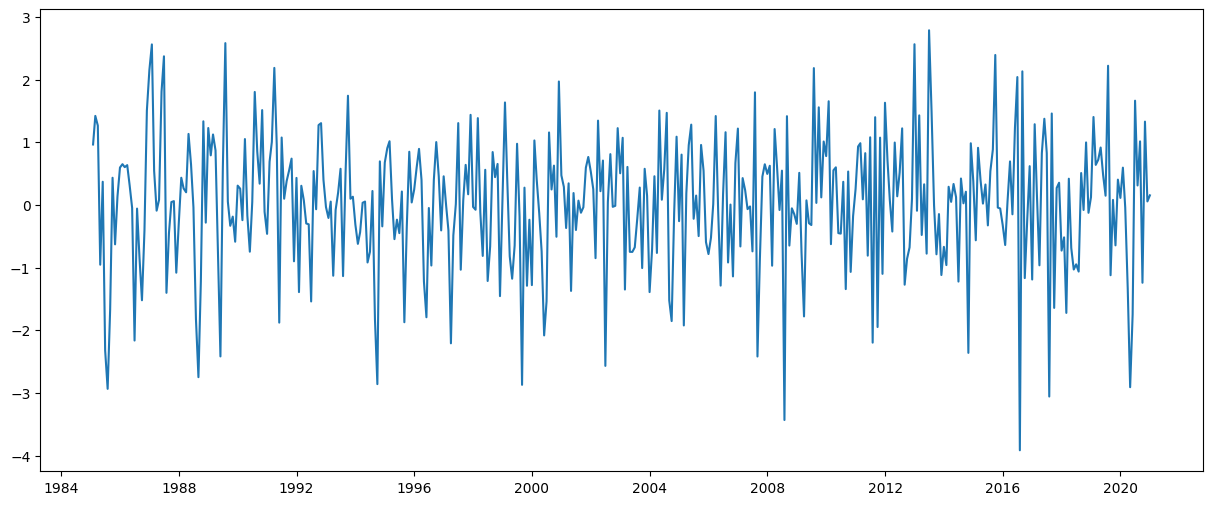

In [176]:
plt.plot(residuos_auto())
plt.show()

**Normalidade**

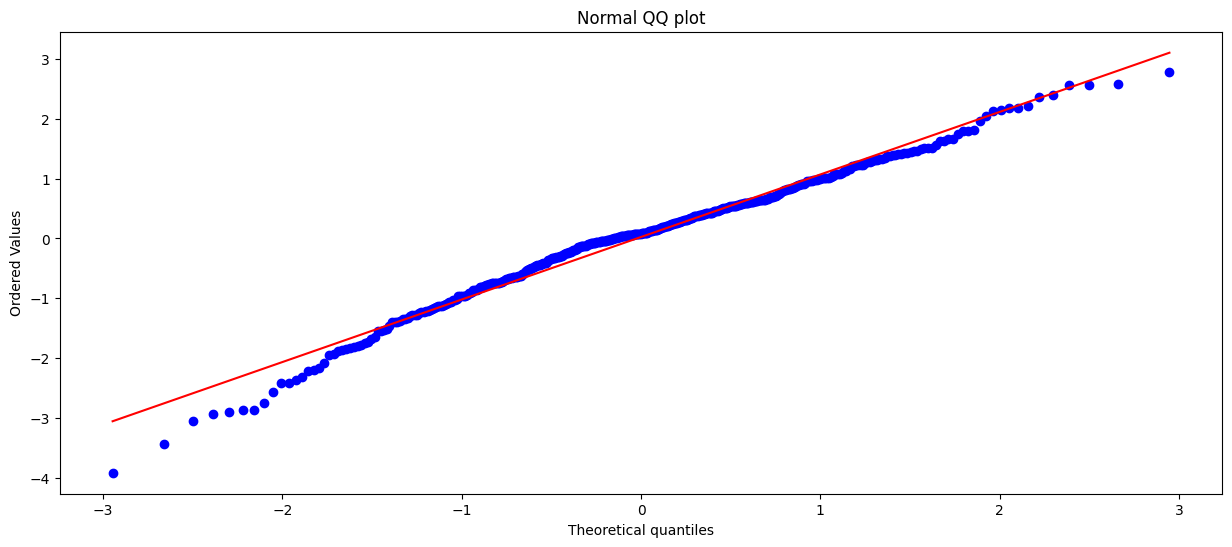

In [177]:
stats.probplot(residuos_auto(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [178]:
e, p = stats.shapiro(residuos_auto())
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9833607077598572
p-valor: 7.269526395248249e-05


/Users/nuvemshop/opt/anaconda3/envs/seriestemporais/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


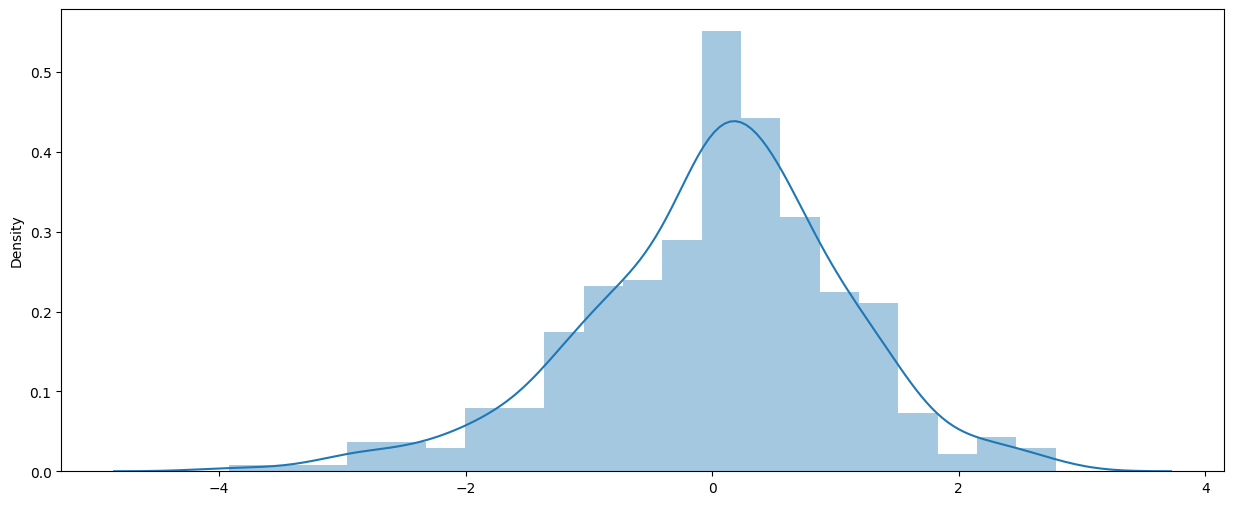

In [179]:
import seaborn as sns
sns.distplot(residuos_auto());

**Autocorrelação**

In [180]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

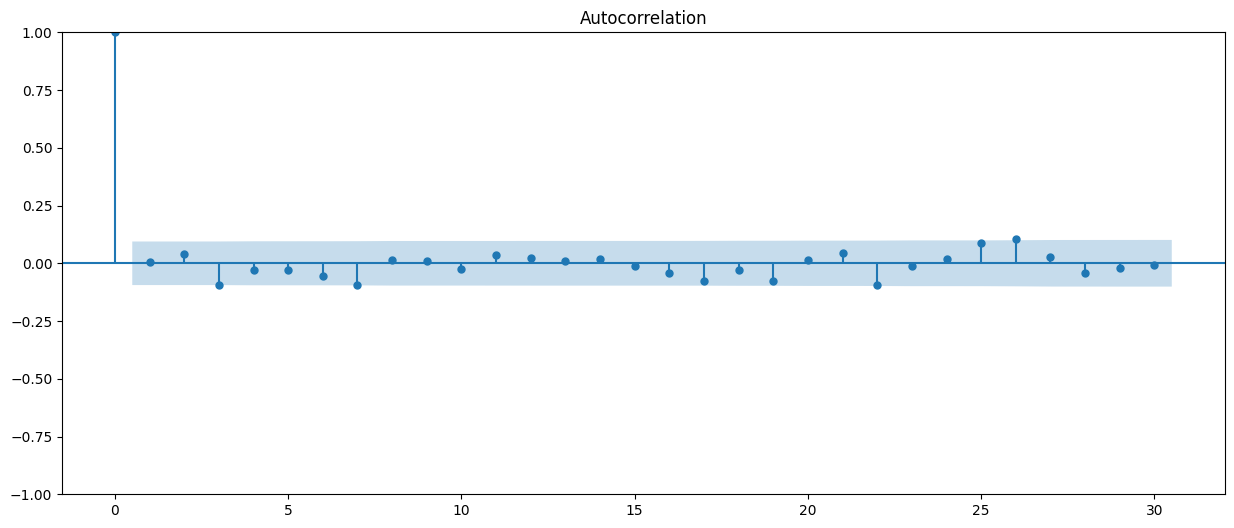

In [181]:
plot_acf(residuos_auto(), lags=30)
plt.show()

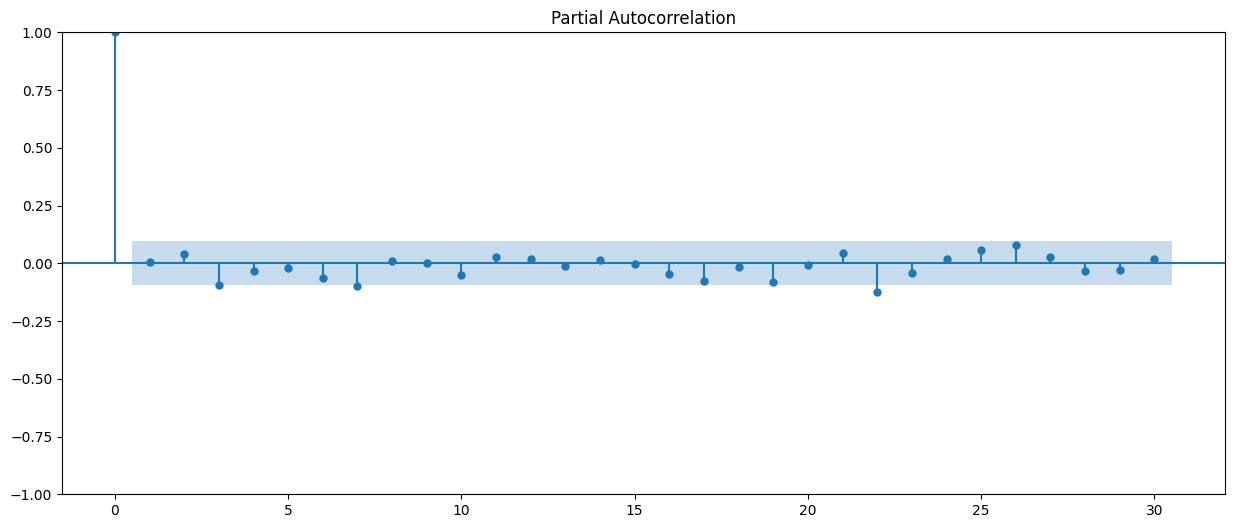

In [182]:
plot_pacf(residuos_auto(), lags=30)
plt.show()

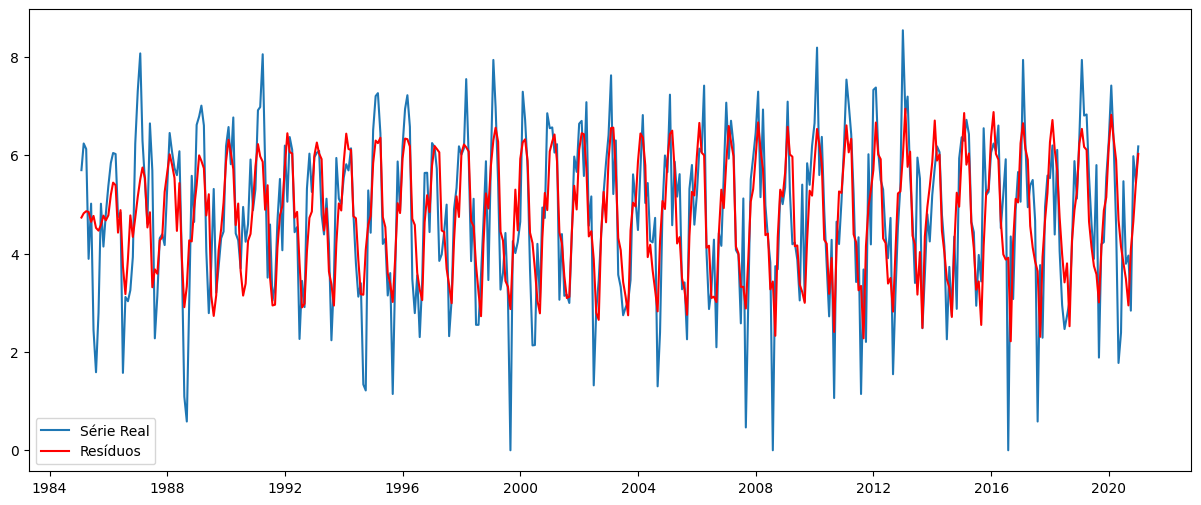

In [183]:
plt.plot(transf_serie_to_raiz_cubica, label='Série Real')
plt.plot(transf_serie_to_raiz_cubica-residuos_auto(),color='red', label='Resíduos')
plt.legend(loc='best')
plt.show()

**Previsão**

In [184]:
previsao_auto = resultado_auto.predict(n_periods=48)
previsao_auto

2021-01-31    6.611232
2021-02-28    5.927515
2021-03-31    5.801338
2021-04-30    4.473477
2021-05-31    4.094916
2021-06-30    3.862136
2021-07-31    2.968357
2021-08-31    3.130741
2021-09-30    3.940626
2021-10-31    5.031863
2021-11-30    5.241628
2021-12-31    6.023416
2022-01-31    6.741108
2022-02-28    6.034813
2022-03-31    6.043939
2022-04-30    4.922818
2022-05-31    4.381565
2022-06-30    3.748929
2022-07-31    3.275577
2022-08-31    2.898913
2022-09-30    4.055987
2022-10-31    4.812801
2022-11-30    5.273369
2022-12-31    6.021565
2023-01-31    6.817988
2023-02-28    6.027472
2023-03-31    5.831446
2023-04-30    4.459908
2023-05-31    4.077572
2023-06-30    3.985016
2023-07-31    3.355845
2023-08-31    3.070367
2023-09-30    3.885366
2023-10-31    4.997618
2023-11-30    5.296388
2023-12-31    6.036654
2024-01-31    6.805671
2024-02-29    6.018519
2024-03-31    5.823849
2024-04-30    4.461795
2024-05-31    4.082103
2024-06-30    3.990188
2024-07-31    3.365368
2024-08-31 

In [185]:

prev_escala_auto = pd.DataFrame()
prev_escala_auto['Previsão_SARIMA'] = previsao_auto ** 3
prev_escala_auto['Previsão_SARIMA']

2021-01-31    288.966275
2021-02-28    208.265856
2021-03-31    195.247074
2021-04-30     89.523214
2021-05-31     68.664956
2021-06-30     57.607997
2021-07-31     26.154630
2021-08-31     30.686081
2021-09-30     61.192160
2021-10-31    127.404975
2021-11-30    144.012002
2021-12-31    218.538809
2022-01-31    306.333076
2022-02-28    219.781667
2022-03-31    220.780248
2022-04-30    119.300219
2022-05-31     84.117757
2022-06-30     52.689192
2022-07-31     35.144982
2022-08-31     24.361584
2022-09-30     66.725179
2022-10-31    111.479174
2022-11-30    146.644062
2022-12-31    218.337441
2023-01-31    316.933954
2023-02-28    218.980544
2023-03-31    198.302796
2023-04-30     88.711028
2023-05-31     67.796124
2023-06-30     63.283480
2023-07-31     37.792513
2023-08-31     28.944815
2023-09-30     58.653753
2023-10-31    124.821449
2023-11-30    148.572807
2023-12-31    219.982834
2024-01-31    315.219341
2024-02-29    218.006237
2024-03-31    197.528776
2024-04-30     88.823708


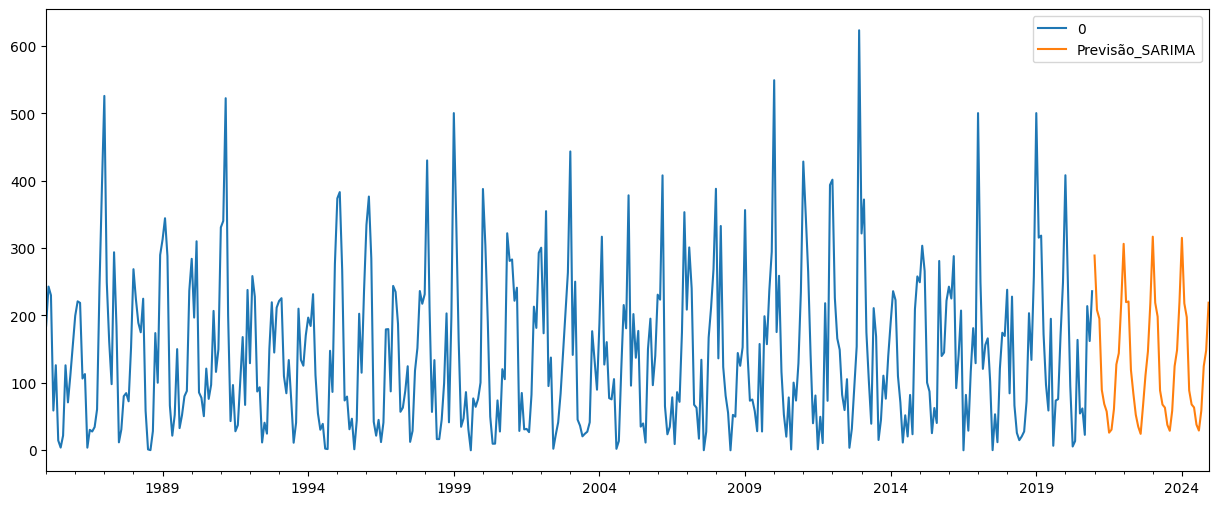

In [186]:
pd.concat([serie5,prev_escala_auto]).plot();

## **Análise final do projeto**

**DESEMPENHO DOS MODELOS**

In [187]:
# Lista com valores reais de 2021
lista = [373.3, 174.1, 137.8, 55.7]
valores_reais = pd.DataFrame(lista, columns = ['valores reais'])
print(valores_reais)

   valores reais
0          373.3
1          174.1
2          137.8
3           55.7


In [188]:
auto = prev_escala_auto.iloc[0:4]
auto

Previsão_SARIMA
2021-01-31       288.966275
2021-02-28       208.265856
2021-03-31       195.247074
2021-04-30        89.523214

In [189]:
desempenho = pd.concat([valores_reais, auto],axis=1)
desempenho

valores reais  Previsão_SARIMA
0                            373.3              NaN
1                            174.1              NaN
2                            137.8              NaN
3                             55.7              NaN
2021-01-31 00:00:00            NaN       288.966275
2021-02-28 00:00:00            NaN       208.265856
2021-03-31 00:00:00            NaN       195.247074
2021-04-30 00:00:00            NaN        89.523214

In [190]:
ar = prev_escala.iloc[1:5]
ar

Previsão_AR
2021-02-28   169.064910
2021-03-31   145.773686
2021-04-30   110.197696
2021-05-31    66.767671

In [191]:
pd.DataFrame.reset_index(ar, drop=True, inplace=True)
ar

Previsão_AR
0   169.064910
1   145.773686
2   110.197696
3    66.767671

In [192]:
ma = prev_escala_ma.iloc[1:5]
ma

Previsão_MA
2020-12-31   122.717078
2021-01-31   119.266722
2021-02-28   166.048847
2021-03-31   165.428342

In [193]:
pd.DataFrame.reset_index(ma, drop=True, inplace=True)
ma

Previsão_MA
0   122.717078
1   119.266722
2   166.048847
3   165.428342

In [194]:
arma = prev_escala_arma.iloc[1:5]
arma

Previsão_ARMA
2021-01-31     155.425082
2021-02-28     144.091687
2021-03-31     134.927654
2021-04-30     103.348801

In [195]:
pd.DataFrame.reset_index(arma, drop=True, inplace=True)
arma

Previsão_ARMA
0     155.425082
1     144.091687
2     134.927654
3     103.348801

In [196]:
arima = prev_escala_arima.iloc[0:4]
arima

Previsão_ARIMA
2021-01-31      170.601424
2021-02-28      214.856759
2021-03-31      167.689156
2021-04-30       92.563940

In [197]:
desempenho = pd.concat([desempenho, ar, ma, arma, arima],axis=1)
desempenho

valores reais  Previsão_SARIMA  Previsão_AR  Previsão_MA  \
0                            373.3              NaN   169.064910   122.717078   
1                            174.1              NaN   145.773686   119.266722   
2                            137.8              NaN   110.197696   166.048847   
3                             55.7              NaN    66.767671   165.428342   
2021-01-31 00:00:00            NaN       288.966275          NaN          NaN   
2021-02-28 00:00:00            NaN       208.265856          NaN          NaN   
2021-03-31 00:00:00            NaN       195.247074          NaN          NaN   
2021-04-30 00:00:00            NaN        89.523214          NaN          NaN   

                     Previsão_ARMA  Previsão_ARIMA  
0                       155.425082             NaN  
1                       144.091687             NaN  
2                       134.927654             NaN  
3                       103.348801             NaN  
2021-01-31 00:00:00            NaN      170.601424  
2021-02-28 00:00:00            NaN      214.856759  
2021-03-31 00:00:00            NaN      167.689156  
2021-04-30 00:00:00            NaN       92.563940

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**ERRO MÉDIO ABSOLUTO (MAE)**

In [203]:
desempenho = desempenho.fillna(0)
desempenho

valores reais  Previsão_SARIMA  Previsão_AR  Previsão_MA  \
0                            373.3         0.000000   169.064910   122.717078   
1                            174.1         0.000000   145.773686   119.266722   
2                            137.8         0.000000   110.197696   166.048847   
3                             55.7         0.000000    66.767671   165.428342   
2021-01-31 00:00:00            0.0       288.966275     0.000000     0.000000   
2021-02-28 00:00:00            0.0       208.265856     0.000000     0.000000   
2021-03-31 00:00:00            0.0       195.247074     0.000000     0.000000   
2021-04-30 00:00:00            0.0        89.523214     0.000000     0.000000   

                     Previsão_ARMA  Previsão_ARIMA  
0                       155.425082        0.000000  
1                       144.091687        0.000000  
2                       134.927654        0.000000  
3                       103.348801        0.000000  
2021-01-31 00:00:00       0.000000      170.601424  
2021-02-28 00:00:00       0.000000      214.856759  
2021-03-31 00:00:00       0.000000      167.689156  
2021-04-30 00:00:00       0.000000       92.563940

In [204]:
print('ERRO MÉDIO ABSOLUTO (MAE)')
mae_sarima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mae_sarima))
mae_ar = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_AR'])
print('AR: {:.2f}'.format(mae_ar))
mae_ma = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_MA'])
print('MA: {:.2f}'.format(mae_ma))
mae_arma = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_ARMA'])
print('ARMA: {:.2f}'.format(mae_arma))
mae_arima = mean_absolute_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'])
print('ARIMA: {:.2f}'.format(mae_arima))

ERRO MÉDIO ABSOLUTO (MAE)
SARIMA: 190.36
AR: 33.90
MA: 55.42
ARMA: 37.30
ARIMA: 173.33


**ERRO QUADRÁTICO MÉDIO (MSE)**

In [205]:
print('ERRO QUADRÁTICO MÉDIO (MSE)')
mse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'])
print('SARIMA: {:.2f}'.format(mse_sarima))
mse_ar = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_AR'])
print('AR: {:.2f}'.format(mse_ar))
mse_ma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_MA'])
print('MA: {:.2f}'.format(mse_ma))
mse_arma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARMA'])
print('ARMA: {:.2f}'.format(mse_arma))
mse_arima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'])
print('ARIMA: {:.2f}'.format(mse_arima))

ERRO QUADRÁTICO MÉDIO (MSE)
SARIMA: 45595.88
AR: 5424.84
MA: 9829.60
ARMA: 6331.08
ARIMA: 37963.88


**RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)**

In [206]:
print('RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)')
rmse_sarima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_SARIMA'], squared=False)
print('SARIMA: {:.2f}'.format(rmse_sarima))
rmse_ar = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_AR'], squared=False)
print('AR: {:.2f}'.format(rmse_ar))
rmse_ma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_MA'], squared=False)
print('MA: {:.2f}'.format(rmse_ma))
rmse_arma = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARMA'], squared=False)
print('ARMA: {:.2f}'.format(rmse_arma))
rmse_arima = mean_squared_error(desempenho['valores reais'], desempenho['Previsão_ARIMA'], squared=False)
print('ARIMA: {:.2f}'.format(rmse_arima))

RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
SARIMA: 213.53
AR: 73.65
MA: 99.14
ARMA: 79.57
ARIMA: 194.84


**Sugestões de Estudos:**

1) Criar uma série com a data final até dezembro de 2019.

2) Fazer todo o estudo com o dataset elnino do Python.

3) https://www.statsmodels.org/devel/datasets/index.html 

In [207]:
import statsmodels.api as sm
sm.datasets.elnino.load_pandas().data

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0   1950.0  23.11  24.20  25.37  23.86  23.03  21.57  20.63  20.15  19.67   
1   1951.0  24.19  25.28  25.60  25.37  24.79  24.69  23.86  22.32  21.44   
2   1952.0  24.52  26.21  26.37  24.73  23.71  22.34  20.89  20.02  19.63   
3   1953.0  24.15  26.34  27.36  27.03  25.47  23.49  22.20  21.45  21.25   
4   1954.0  23.02  25.00  25.33  22.97  21.73  20.77  19.52  19.33  18.95   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
56  2006.0  24.76  26.52  26.22  24.29  23.84  22.82  22.20  21.89  21.93   
57  2007.0  25.82  26.81  26.41  24.96  23.05  21.61  21.05  19.95  19.85   
58  2008.0  24.24  26.39  26.91  25.68  24.43  23.19  23.02  22.14  21.60   
59  2009.0  24.39  25.53  25.48  25.84  24.95  24.09  23.09  22.03  21.48   
60  2010.0  24.70  26.16  26.54  26.04  24.75  23.26  21.11  19.49  19.28   

      OCT    NOV    DEC  
0   20.03  20.02  21.80  
1   21.77  22.33  22.89  
2   20.40  20.77  22.39  
3   20.95  21.60  22.44  
4   19.11  20.27  21.30  
..    ...    ...    ...  
56  22.46  22.61  24.15  
57  19.31  19.82  21.15  
58  21.39  21.54  22.73  
59  21.64  21.99  23.21  
60  19.73  20.44  22.07  

[61 rows x 13 columns]